# Модуль 1

## 1.1 Подготовка данных
Загрузим данные и подключим библиотеки

In [1]:
# Библиотеки необходимые для работы с данными
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
weather_data = pd.read_csv('weather.csv')
weather_data.head(4)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0


In [3]:
tr_frirst = pd.read_excel('train_first_part.xlsx')
tr_frirst.head(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429


In [4]:
tr_second = pd.read_json('train_second_part.json')
tr_second.head(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3758523,2,6/2/16 2:30,6/2/16 2:50,6,-73.991272,40.697350,-73.989700,40.767689,N,1210
1,id1849264,2,1/6/16 18:12,1/6/16 18:30,5,-73.988281,40.723385,-74.005089,40.749908,N,1077
2,id3457947,1,2/28/16 12:09,2/28/16 12:11,1,-73.968872,40.767120,-73.962051,40.776581,N,135
3,id2181863,2,6/26/16 16:22,6/26/16 16:29,1,-73.982330,40.775517,-73.965622,40.804626,N,415


Данные были успешно загруженны. Теперь объеденим обе части обучающего набора данных в один.

In [5]:
data_all = pd.concat([tr_frirst, tr_second])
data_all

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
8582,id0002921,1,4/6/16 14:16,4/6/16 14:20,1,-73.973015,40.760948,-73.976387,40.755604,N,207
8583,id1329189,2,3/24/16 1:26,3/24/16 1:38,1,-73.985550,40.727257,-73.957039,40.712387,N,740
8584,id0408460,1,2/23/16 16:38,2/23/16 16:48,1,-73.972038,40.750202,-73.998360,40.733360,N,605
8585,id0147762,1,5/24/16 7:20,5/24/16 7:25,1,-73.993332,40.724342,-74.004250,40.707470,N,287


Данные успешно объеденены

## 1.2 Формирование дополнительных атрибутов

### 1.2.1 добавление в набор данных по погоде в соответствие с данными поездки

In [6]:
# Переведём даты в формат дата время
data_all['pickup_datetime'] = pd.to_datetime(data_all['pickup_datetime'])
data_all['dropoff_datetime'] = pd.to_datetime(data_all['dropoff_datetime'])
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%m-%Y')

In [7]:
# Отберём в отдельные столбцы день и месяц отбытия и прибытия для data_all и также только для weather_data
data_all['pickup_date'] = data_all['pickup_datetime'].dt.day
data_all['pickup_month'] = data_all['pickup_datetime'].dt.month
data_all['dropoff_date'] = data_all['dropoff_datetime'].dt.day
data_all['dropoff_month'] = data_all['dropoff_datetime'].dt.month
weather_data['month'] = weather_data['date'].dt.month
weather_data['date'] = weather_data['date'].dt.day

In [8]:
# Отбросим данные столбцы
data_all.drop(columns=['pickup_datetime', 'dropoff_datetime'], inplace=True)
data_all.head(4)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,dropoff_date,dropoff_month
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,14,3
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,12,6
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,19,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,6,4


In [9]:
weather_data[weather_data['month'] == 3]

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,month
60,1,52,39,45.5,0.00,0.0,0,3
61,2,55,29,42.0,0.14,0.0,0,3
62,3,36,26,31.0,0.00,0.0,0,3
63,4,39,30,34.5,0.11,0.4,T,3
64,5,41,28,34.5,0.00,0.0,0,3
65,6,44,32,38.0,0.00,0.0,0,3
66,7,60,36,48.0,0.00,0.0,0,3
67,8,67,47,57.0,0.00,0.0,0,3
68,9,77,44,60.5,0.00,0.0,0,3
69,10,79,63,71.0,0.00,0.0,0,3


In [10]:
# сделаем 2 копии weather_data
wd_pick = weather_data.copy()
wd_drop = weather_data.copy()

# Переименуем столбцы
wd_pick = wd_pick.rename(columns={'date': 'pickup_date', 'maximum temperature': 'pick_max_temp', 'minimum temperature': 'pick_min_temp',
                                  'average temperature': 'pick_avg_temp', 'precipitation': 'pick_precip', 
                                  'snow fall': 'pick_snow_fall', 'snow depth': 'pick_snow_depth', 'month': 'pickup_month'})
wd_drop = wd_drop.rename(columns={'date': 'dropoff_date', 'maximum temperature': 'drop_max_temp', 'minimum temperature': 'drop_min_temp',
                                  'average temperature': 'drop_avg_temp', 'precipitation': 'drop_precip', 
                                  'snow fall': 'drop_snow_fall', 'snow depth': 'drop_snow_depth', 'month': 'dropoff_month'})
wd_pick.head(4)

,pickup_date,pick_max_temp,pick_min_temp,pick_avg_temp,pick_precip,pick_snow_fall,pick_snow_depth,pickup_month
0,1,42,34,38.0,0.00,0.0,0,1
1,2,40,32,36.0,0.00,0.0,0,1
2,3,45,35,40.0,0.00,0.0,0,1
3,4,36,14,25.0,0.00,0.0,0,1


In [11]:
wd_drop.head(4)

,dropoff_date,drop_max_temp,drop_min_temp,drop_avg_temp,drop_precip,drop_snow_fall,drop_snow_depth,dropoff_month
0,1,42,34,38.0,0.00,0.0,0,1
1,2,40,32,36.0,0.00,0.0,0,1
2,3,45,35,40.0,0.00,0.0,0,1
3,4,36,14,25.0,0.00,0.0,0,1


In [12]:
data_all = pd.merge(data_all, wd_pick, how='left', left_on=['pickup_month', 'pickup_date'], right_on = ['pickup_month','pickup_date'])
data_with_weather = pd.merge(data_all, wd_drop, how='left', left_on=['dropoff_month', 'dropoff_date'], right_on = ['dropoff_month','dropoff_date'])
data_with_weather.head(4)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,...,pick_avg_temp,pick_precip,pick_snow_fall,pick_snow_depth,drop_max_temp,drop_min_temp,drop_avg_temp,drop_precip,drop_snow_fall,drop_snow_depth
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,...,45.5,0.29,0.0,0,51,40,45.5,0.29,0.0,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,...,72.5,0.00,0.0,0,83,62,72.5,0.00,0.0,0
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,...,22.0,0.00,0.0,T,28,16,22.0,0.00,0.0,T
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,...,39.0,0.00,0.0,0,48,30,39.0,0.00,0.0,0


### 1.2.2 Добавление категориальной переменной 
Введите дополнительную категориальную переменную «категория по времени поездки»:  «1» - очень быстрые (1 квартиль по целевой переменной), «2» - быстрые (2 квартиль по целевой переменной), «3» - средние (3 квартиль по целевой переменной), «4» - медленные (4 квартиль по целевой переменной).

Разобьём параметр trip_duration на 4 промежутка по 5 кватрилям.
1-ый - от минимального значения до 25% значения. Всё что попадает в этот помежуток получит категориальную переменную равную 1.
2-ый - от 25% значения до 50% значения. Всё что попадает в этот помежуток получит категориальную переменную равную 2.
3-ый - от 50% значения до 75% значения. Всё что попадает в этот помежуток получит категориальную переменную равную 3.
4-ый - от 75% значения до максимального значения. Всё что попадает в этот помежуток получит категориальную переменную равную 4.

In [13]:
# Создание пяти квартилей
min_qantil = data_with_weather['trip_duration'].quantile(0)
tf_qantil = data_with_weather['trip_duration'].quantile(0.25)
median_qantil = data_with_weather['trip_duration'].quantile(0.5)
sf_qantil = data_with_weather['trip_duration'].quantile(0.75)
max_qantil = data_with_weather['trip_duration'].quantile(1)

In [14]:
# Вычисление по промежуткам
trip_class=[]
for i in range(len(data_with_weather)):
    if data_with_weather.loc[i, 'trip_duration'] >= min_qantil and data_with_weather.loc[i, 'trip_duration'] < tf_qantil:
        trip_class.append(1)
    if data_with_weather.loc[i, 'trip_duration'] >= tf_qantil and data_with_weather.loc[i, 'trip_duration'] < median_qantil:
        trip_class.append(2)
    if data_with_weather.loc[i, 'trip_duration'] >= median_qantil and data_with_weather.loc[i, 'trip_duration'] < sf_qantil:
        trip_class.append(3)
    if data_with_weather.loc[i, 'trip_duration'] >= sf_qantil and data_with_weather.loc[i, 'trip_duration'] <= max_qantil:
        trip_class.append(4)

In [15]:
data_with_weather['trip_class'] = trip_class
data_with_weather.head(4)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,...,pick_precip,pick_snow_fall,pick_snow_depth,drop_max_temp,drop_min_temp,drop_avg_temp,drop_precip,drop_snow_fall,drop_snow_depth,trip_class
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,...,0.29,0.0,0,51,40,45.5,0.29,0.0,0,2
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,...,0.00,0.0,0,83,62,72.5,0.00,0.0,0,3
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,...,0.00,0.0,T,28,16,22.0,0.00,0.0,T,4
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,...,0.00,0.0,0,48,30,39.0,0.00,0.0,0,2


In [16]:
data_with_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048609 entries, 0 to 1048608
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048609 non-null  object 
 1   vendor_id           1048609 non-null  int64  
 2   passenger_count     1048609 non-null  int64  
 3   pickup_longitude    1048609 non-null  float64
 4   pickup_latitude     1048609 non-null  float64
 5   dropoff_longitude   1048609 non-null  float64
 6   dropoff_latitude    1048609 non-null  float64
 7   store_and_fwd_flag  1048609 non-null  object 
 8   trip_duration       1048609 non-null  int64  
 9   pickup_date         1048609 non-null  int32  
 10  pickup_month        1048609 non-null  int32  
 11  dropoff_date        1048609 non-null  int32  
 12  dropoff_month       1048609 non-null  int32  
 13  pick_max_temp       1048609 non-null  int64  
 14  pick_min_temp       1048609 non-null  int64  
 15  pick_avg_temp  

## 1.3 Описание структуры набора данных

В нашем наборе данных присутствуют следующие признаки:
1. id - номер записи
2. vendor_id - номер перевозчика
3. passenger_count - кол-во пассажиров
4. pickup_longitude и pickup_latitude - координаты посадки
5. dropoff_longitude и dropoff_latitude - координаты высадки
6. store_and_fwd_flag сохранялась ли запись о поездке в памяти автомобиля перед отправкой поставщику, поскольку у автомобиля не было подключения к серверу - Y= сохранить и переслать; N = поездка без сохранения и переадресации
7. trip_duration - время поездки в секундах
8. pickup_month и pickup_date - месяц и день посадки
9. dropoff_month и dropoff_date - месяц и день высадки
10. pick_max_temp, pick_min_temp, pick_avg_temp, pick_precip, pick_snow_fall, pick_snow_depth - информация о погоде в день посадки(максимальная, максимальная и средняя температура; кол-во осадков; кол-во выпавшего снега; глубина снега) 
11. drop_max_temp, drop_min_temp, drop_avg_temp, drop_precip, drop_snow_fall, drop_snow_depth - информация о погоде в день высадки(максимальная, максимальная и средняя температура; кол-во осадков; кол-во выпавшего снега; глубина снега)
12. trip_class - класс длинны поездки: «1» - очень быстрые, «2» - быстрые, «3» - средние, «4» - медленные

Посмотрим на наличие пустых значений

In [17]:
data_with_weather.isnull().sum()/data_with_weather.shape[0] * 100

id                    0.0
vendor_id             0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
pickup_date           0.0
pickup_month          0.0
dropoff_date          0.0
dropoff_month         0.0
pick_max_temp         0.0
pick_min_temp         0.0
pick_avg_temp         0.0
pick_precip           0.0
pick_snow_fall        0.0
pick_snow_depth       0.0
drop_max_temp         0.0
drop_min_temp         0.0
drop_avg_temp         0.0
drop_precip           0.0
drop_snow_fall        0.0
drop_snow_depth       0.0
trip_class            0.0
dtype: float64

Пустые значения не присутствуют в нашем наборе

Посмотрим на распределение числовых атрибутов

array([[<Axes: title={'center': 'vendor_id'}>,
        <Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'pickup_longitude'}>,
        <Axes: title={'center': 'pickup_latitude'}>],
       [<Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>,
        <Axes: title={'center': 'trip_duration'}>,
        <Axes: title={'center': 'pickup_date'}>],
       [<Axes: title={'center': 'pickup_month'}>,
        <Axes: title={'center': 'dropoff_date'}>,
        <Axes: title={'center': 'dropoff_month'}>,
        <Axes: title={'center': 'pick_max_temp'}>],
       [<Axes: title={'center': 'pick_min_temp'}>,
        <Axes: title={'center': 'pick_avg_temp'}>,
        <Axes: title={'center': 'drop_max_temp'}>,
        <Axes: title={'center': 'drop_min_temp'}>],
       [<Axes: title={'center': 'drop_avg_temp'}>,
        <Axes: title={'center': 'trip_class'}>, <Axes: >, <Axes: >]],
      dtype=object)

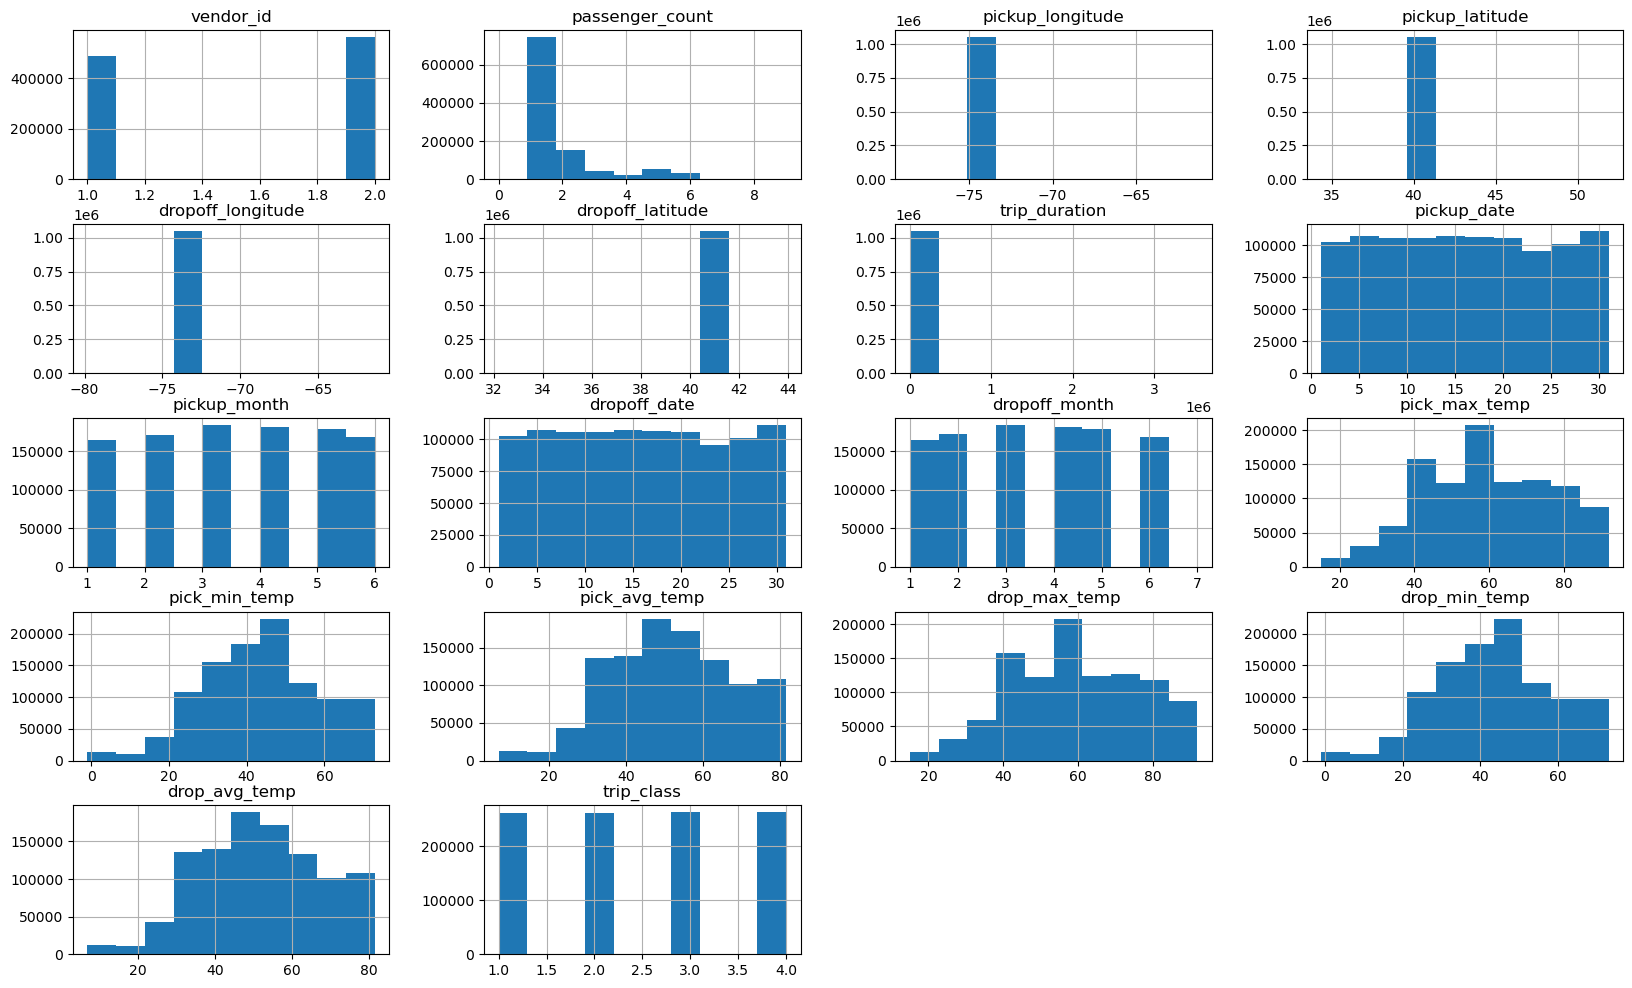

In [18]:
data_with_weather.hist(figsize=(20, 12))

## 1.4 Предобработка данных

### 1.4.1 Удаление технической информации

Технической информацией я могу выделить только 3 атрибута: id и vendor_id и store_and_fwd_flag. Данные атрибуты несут информацию только о записи и не как не влияют на целевые переменные.

In [19]:
data_with_weather.drop(columns=['id','vendor_id', 'store_and_fwd_flag'], inplace=True)

### 1.4.2 Кодировка информации

In [20]:
data_with_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048609 entries, 0 to 1048608
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   passenger_count    1048609 non-null  int64  
 1   pickup_longitude   1048609 non-null  float64
 2   pickup_latitude    1048609 non-null  float64
 3   dropoff_longitude  1048609 non-null  float64
 4   dropoff_latitude   1048609 non-null  float64
 5   trip_duration      1048609 non-null  int64  
 6   pickup_date        1048609 non-null  int32  
 7   pickup_month       1048609 non-null  int32  
 8   dropoff_date       1048609 non-null  int32  
 9   dropoff_month      1048609 non-null  int32  
 10  pick_max_temp      1048609 non-null  int64  
 11  pick_min_temp      1048609 non-null  int64  
 12  pick_avg_temp      1048609 non-null  float64
 13  pick_precip        1048609 non-null  object 
 14  pick_snow_fall     1048609 non-null  object 
 15  pick_snow_depth    1048609 non-n

На данный момент у нас есть 6 объектовых атрибутов несущих информацию о осадках, кол-ве снега и глубины снега в день посадки и высадки. Посмотрим на их уникальные значения.

In [21]:
obj_col = []
for col in data_with_weather.columns:
    if data_with_weather[col].dtype == 'object':
        obj_col.append(col)

for col in obj_col:
    print(f"У атрибута {col} {len(data_with_weather[col].unique())} уникальных значения")
    print(data_with_weather[col].unique())
    

У атрибута pick_precip 36 уникальных значения
['0.29' '0.00' '0.04' '0.01' '0.45' '0.91' '0.02' '0.11' 'T' '0.06' '0.44'
 '0.05' '0.25' '0.18' '0.73' '0.07' '0.20' '0.24' '0.09' '1.80' '0.14'
 '1.22' '0.22' '0.16' '0.30' '0.53' '0.40' '0.47' '0.61' '2.31' '0.03'
 '0.12' '0.54' '1.01' '0.38' '1.65']
У атрибута pick_snow_fall 9 уникальных значения
['0.0' 'T' '1.4' '0.2' '2.5' '0.4' '0.1' '27.3' '0.5']
У атрибута pick_snow_depth 10 уникальных значения
['0' 'T' '6' '9' '17' '2' '4' '1' '19' '22']
У атрибута drop_precip 37 уникальных значения
['0.29' '0.00' '0.04' '0.01' '0.45' '0.91' '0.02' '0.11' 'T' '0.06' '0.44'
 '0.05' '0.25' '0.18' '0.73' '0.07' '0.20' '0.24' '0.09' '1.80' '0.14'
 '1.22' '0.22' '0.16' '0.30' '0.53' '0.40' '0.47' '0.61' '2.31' '0.03'
 '0.12' '0.54' '1.01' '0.38' '1.65' '0.83']
У атрибута drop_snow_fall 10 уникальных значения
['0.0' 'T' '1.4' '0.2' '2.5' '0.4' '0.1' '27.3' '0.5' '0']
У атрибута drop_snow_depth 10 уникальных значения
['0' 'T' '6' '9' '17' '2' '4' '1' '19

Как мы можем наблюдать во всех столбцах присутствует некое значение T. Посмотрим на его процентное содержание.

In [22]:
for col in obj_col:
    print(data_with_weather[col].value_counts()/data_with_weather.shape[0] * 100)
    

pick_precip
0.00    60.842888
T        7.313498
0.01     3.902217
0.16     2.302670
0.04     2.278924
0.02     2.253271
0.05     2.148084
0.09     1.694149
0.11     1.298482
0.24     1.139986
0.06     1.113761
0.45     1.048627
0.54     0.630454
0.40     0.609951
0.53     0.589352
0.14     0.585824
0.22     0.583535
1.22     0.580769
0.25     0.578481
0.61     0.575620
0.07     0.565416
0.20     0.560552
0.30     0.559122
0.29     0.549871
0.47     0.545198
0.73     0.536043
0.03     0.531847
0.18     0.528319
1.01     0.527842
0.91     0.519259
1.80     0.511535
0.44     0.501045
0.38     0.496372
0.12     0.496181
1.65     0.386893
2.31     0.113960
Name: count, dtype: float64
pick_snow_fall
0.0     89.586013
T        6.436050
0.4      1.172124
0.2      0.605087
2.5      0.589352
0.5      0.503429
1.4      0.501045
0.1      0.492939
27.3     0.113960
Name: count, dtype: float64
pick_snow_depth
0     91.119474
T      3.764129
6      1.892889
1      0.589352
4      0.522406
9      0.50

Максимальное содержание Т составляет не более 7.3%. Посмотрим как изменется кол-во строк если мы удалим все строки содержащие Т

In [23]:
copy_data = data_with_weather.copy()
for col in obj_col:
    copy_data.drop(index=copy_data[copy_data[col] == 'T'].index, inplace=True)


In [24]:
print(f"Строк изначально {data_with_weather.shape[0]}")
print(f"Строк стало {copy_data.shape[0]}")
print(f"Разница {data_with_weather.shape[0] - copy_data.shape[0]}")
print(f"Разница в процентах {(data_with_weather.shape[0] - copy_data.shape[0])/data_with_weather.shape[0] * 100}")

Строк изначально 1048609
Строк стало 888400
Разница 160209
Разница в процентах 15.278240030364035


Данное кол-во потерь я считаю приемлемым. Теперь удалим строки с Т на основном наборе.

In [25]:
for col in obj_col:
    data_with_weather.drop(index=data_with_weather[data_with_weather[col] == 'T'].index, inplace=True)

In [26]:
# Посмотрим на текущие уникальные значения
for col in obj_col:
    print(f"У атрибута {col} {len(data_with_weather[col].unique())} уникальных значения")
    print(data_with_weather[col].unique())

У атрибута pick_precip 31 уникальных значения
['0.29' '0.00' '0.04' '0.01' '0.45' '0.91' '0.02' '0.06' '0.44' '0.05'
 '0.25' '0.18' '0.73' '0.20' '0.24' '0.09' '1.80' '0.14' '1.22' '0.22'
 '0.16' '0.53' '0.40' '0.61' '2.31' '0.03' '0.12' '0.54' '1.01' '0.38'
 '1.65']
У атрибута pick_snow_fall 7 уникальных значения
['0.0' '1.4' '0.2' '2.5' '0.4' '0.1' '27.3']
У атрибута pick_snow_depth 7 уникальных значения
['0' '6' '17' '2' '4' '1' '19']
У атрибута drop_precip 32 уникальных значения
['0.29' '0.00' '0.04' '0.01' '0.45' '0.91' '0.02' '0.06' '0.44' '0.05'
 '0.25' '0.18' '0.73' '0.20' '0.24' '0.09' '1.80' '0.14' '1.22' '0.22'
 '0.16' '0.53' '0.40' '0.61' '2.31' '0.03' '0.12' '0.54' '1.01' '0.38'
 '1.65' '0.83']
У атрибута drop_snow_fall 8 уникальных значения
['0.0' '1.4' '0.2' '2.5' '0.4' '0.1' '27.3' '0']
У атрибута drop_snow_depth 7 уникальных значения
['0' '6' '17' '2' '4' '1' '19']


Все остальные данные имеют числовой тип. Переведём дробные значения в тип float а целые в тип int

In [27]:
data_with_weather['pick_precip'] = data_with_weather['pick_precip'].astype(float)
data_with_weather['drop_precip'] = data_with_weather['drop_precip'].astype(float)
data_with_weather['pick_snow_fall'] = data_with_weather['pick_snow_fall'].astype(float)
data_with_weather['drop_snow_fall'] = data_with_weather['drop_snow_fall'].astype(float)

data_with_weather['pick_snow_depth'] = data_with_weather['pick_snow_depth'].astype(int)
data_with_weather['drop_snow_depth'] = data_with_weather['drop_snow_depth'].astype(int)

In [28]:
data_with_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888400 entries, 0 to 1048608
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   passenger_count    888400 non-null  int64  
 1   pickup_longitude   888400 non-null  float64
 2   pickup_latitude    888400 non-null  float64
 3   dropoff_longitude  888400 non-null  float64
 4   dropoff_latitude   888400 non-null  float64
 5   trip_duration      888400 non-null  int64  
 6   pickup_date        888400 non-null  int32  
 7   pickup_month       888400 non-null  int32  
 8   dropoff_date       888400 non-null  int32  
 9   dropoff_month      888400 non-null  int32  
 10  pick_max_temp      888400 non-null  int64  
 11  pick_min_temp      888400 non-null  int64  
 12  pick_avg_temp      888400 non-null  float64
 13  pick_precip        888400 non-null  float64
 14  pick_snow_fall     888400 non-null  float64
 15  pick_snow_depth    888400 non-null  int32  
 16  drop_m

### 1.4.3 Обработка выбросов и аномалий

Построим коробки с усами для каждого признака

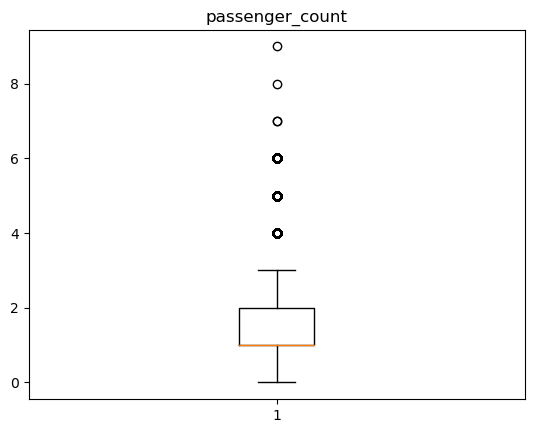

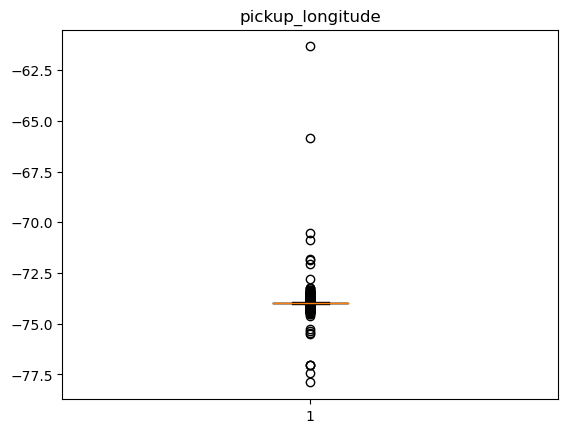

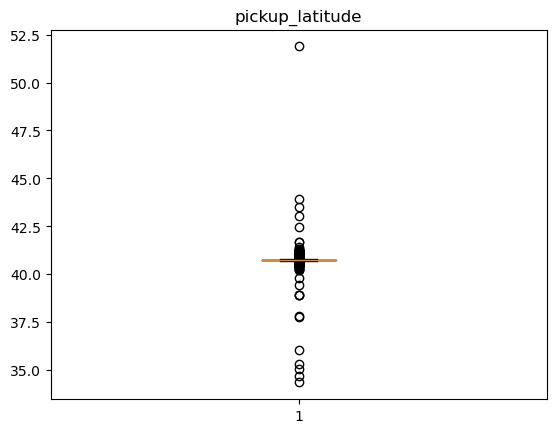

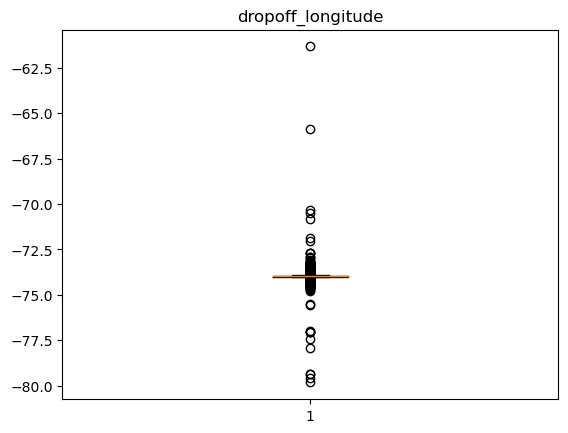

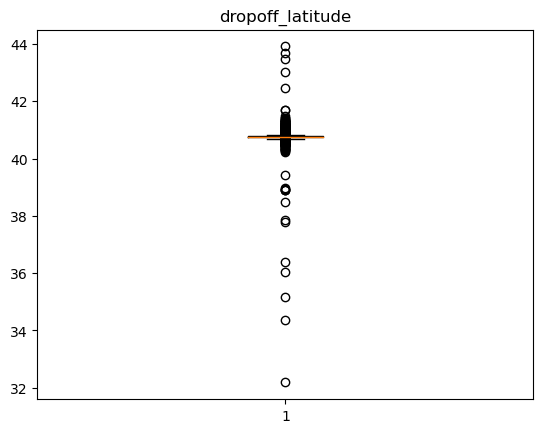

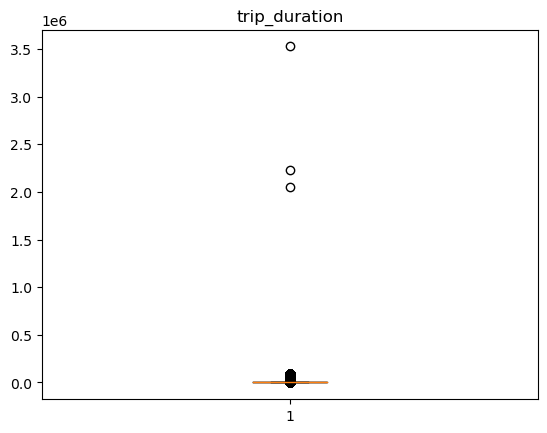

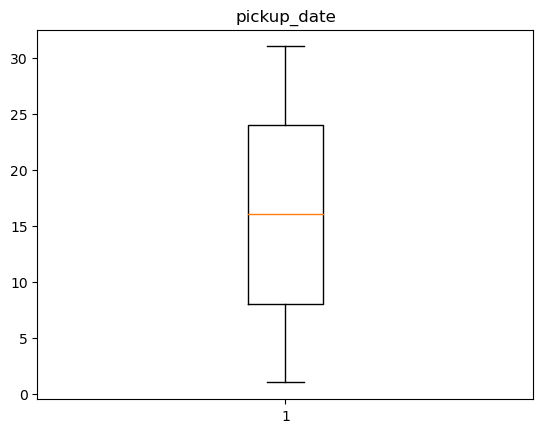

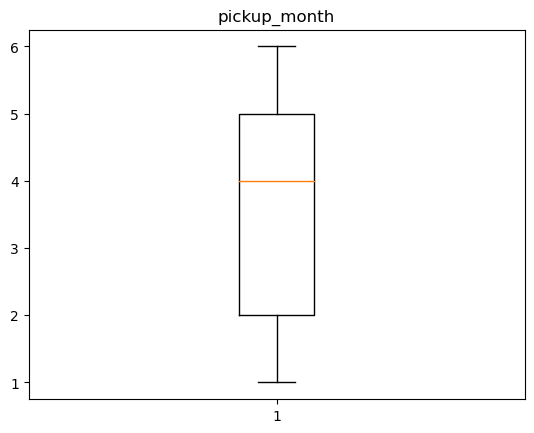

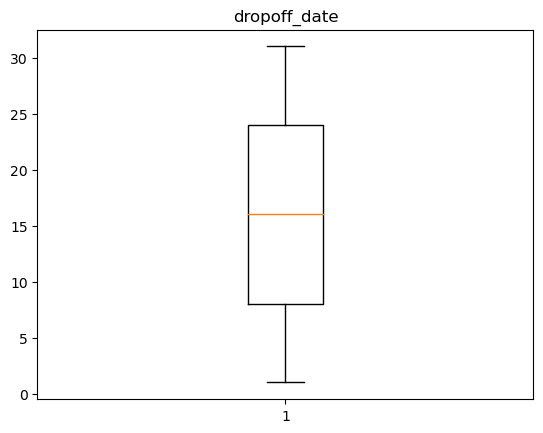

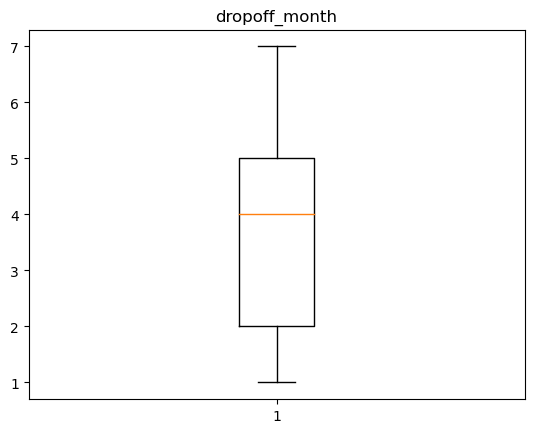

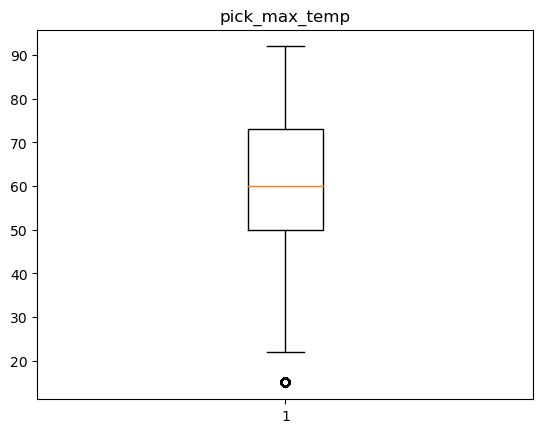

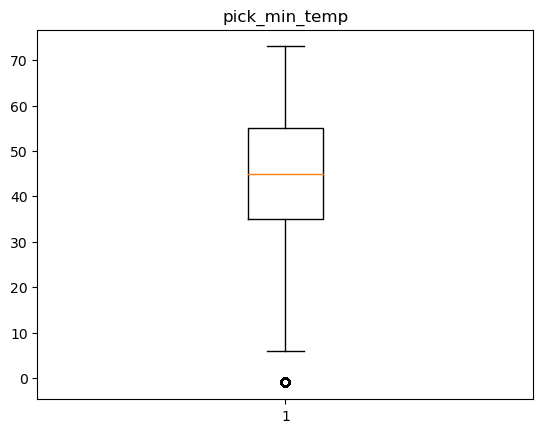

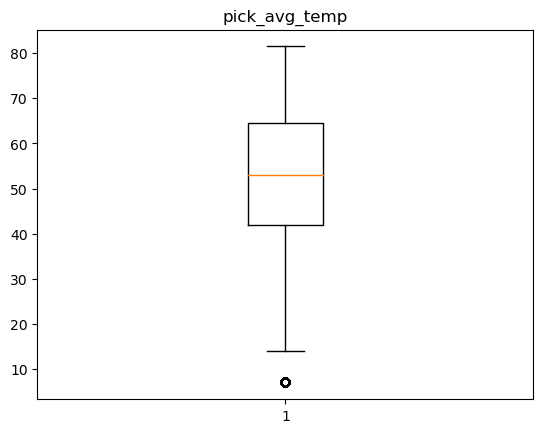

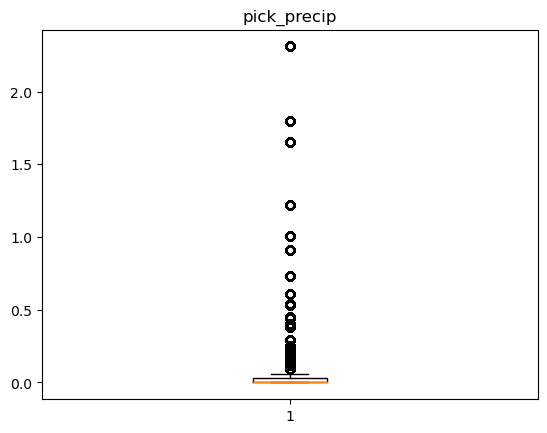

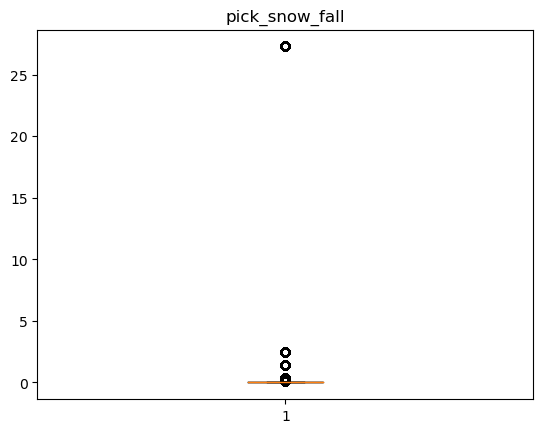

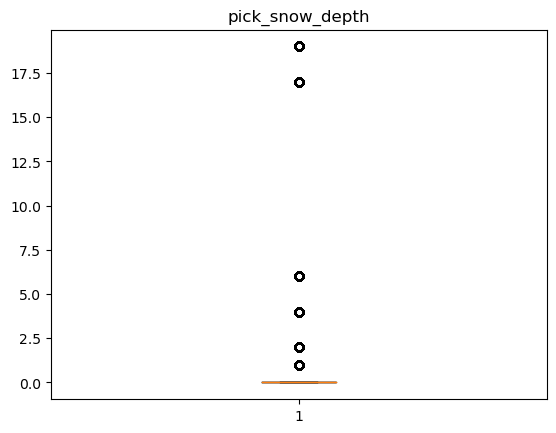

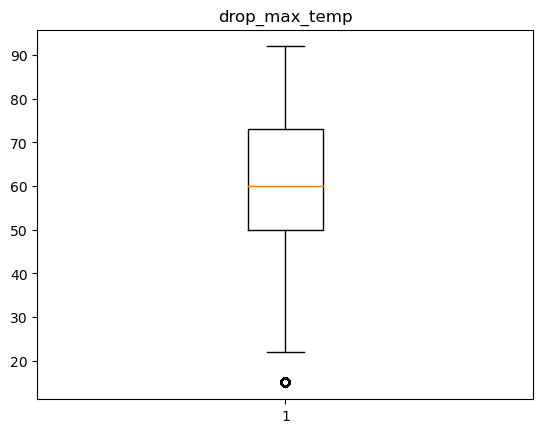

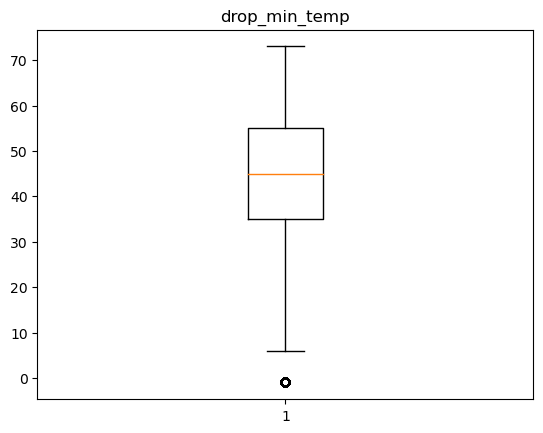

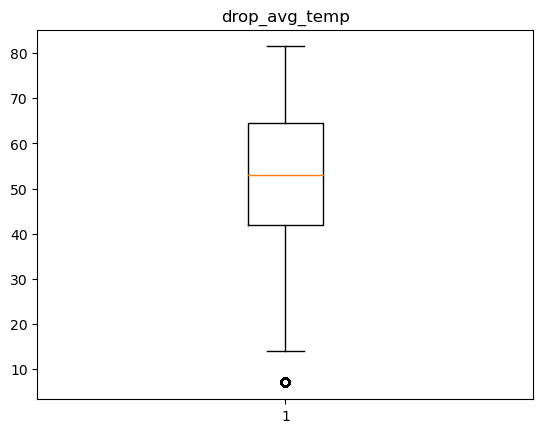

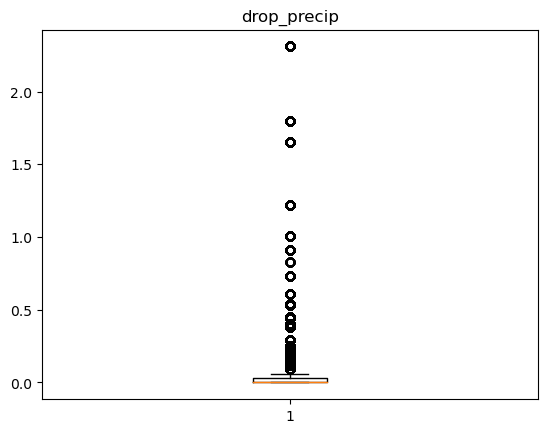

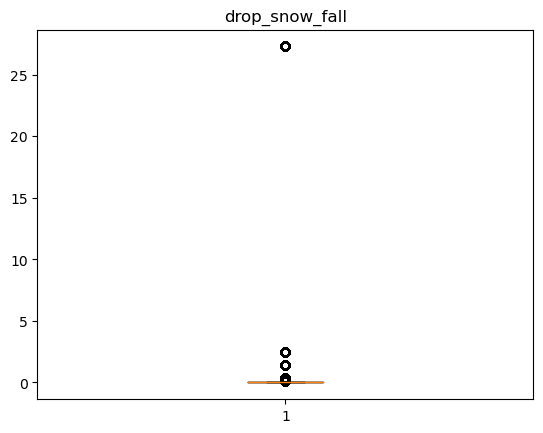

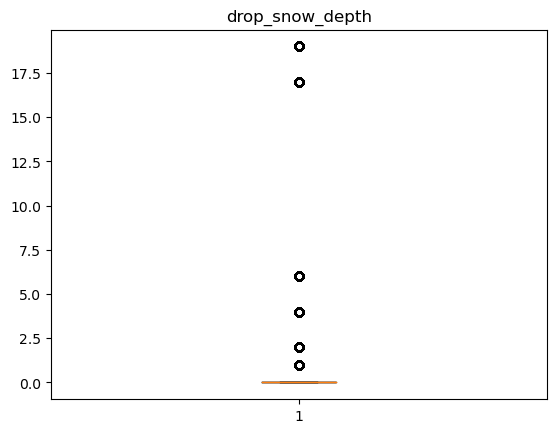

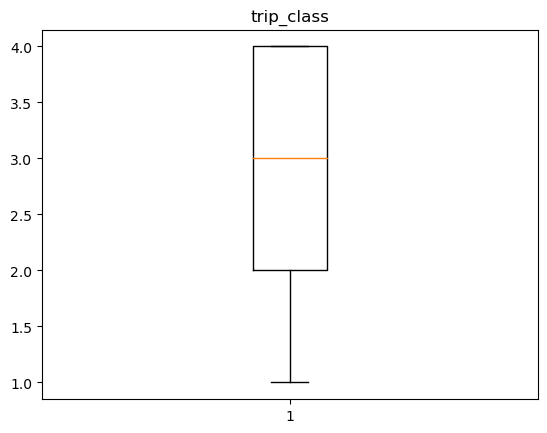

In [29]:
for col in data_with_weather.columns:
    plt.boxplot(data_with_weather[col])
    plt.title(col)
    plt.show();

In [30]:
# passenger_count
for i in range(3, 10):
    print(f"кол-во записей с значением больше {i}: {len(data_with_weather[data_with_weather['passenger_count']>i])}")

кол-во записей с значением больше 3: 94417
кол-во записей с значением больше 4: 76996
кол-во записей с значением больше 5: 29282
кол-во записей с значением больше 6: 4
кол-во записей с значением больше 7: 2
кол-во записей с значением больше 8: 1
кол-во записей с значением больше 9: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x1139a168290>,
 'caps': [<matplotlib.lines.Line2D at 0x1139a16ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1139a168790>],
 'medians': [<matplotlib.lines.Line2D at 0x1139a891250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1139a16b4d0>],
 'means': []}

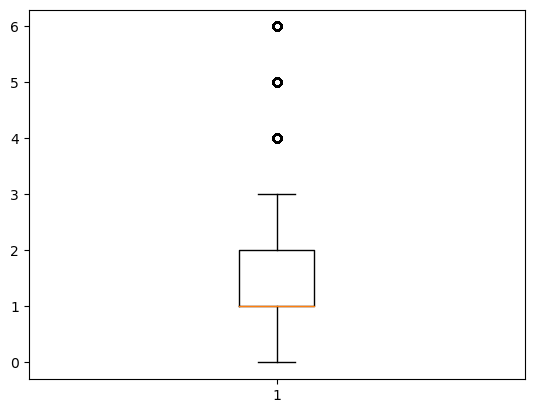

In [31]:
# удалим все записи после 6
data_with_weather.drop(index=data_with_weather[data_with_weather['passenger_count'] > 6].index, inplace=True)
plt.boxplot(data_with_weather['passenger_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1139a03b090>,
 'caps': [<matplotlib.lines.Line2D at 0x1139a024310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1139a03a690>],
 'medians': [<matplotlib.lines.Line2D at 0x1139a025390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1139b535e10>],
 'means': []}

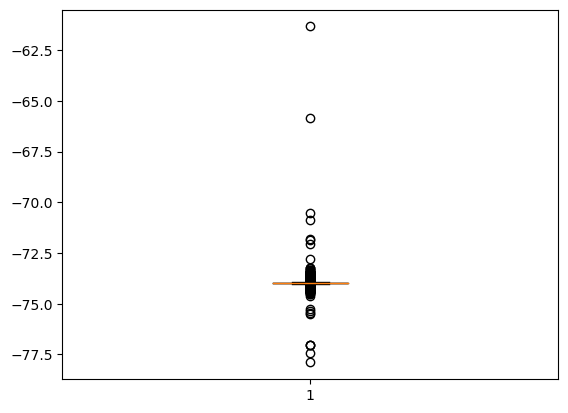

In [32]:
# pickup longitude
plt.boxplot(data_with_weather['pickup_longitude'])

In [33]:
i = -74
while i < -64:
    print(f"кол-во записей с значением больше {i}: {len(data_with_weather[data_with_weather['pickup_longitude']>i])}")
    i += 0.2

кол-во записей с значением больше -74: 772502
кол-во записей с значением больше -73.8: 19611
кол-во записей с значением больше -73.6: 43
кол-во записей с значением больше -73.39999999999999: 15
кол-во записей с значением больше -73.19999999999999: 8
кол-во записей с значением больше -72.99999999999999: 8
кол-во записей с значением больше -72.79999999999998: 7
кол-во записей с значением больше -72.59999999999998: 7
кол-во записей с значением больше -72.39999999999998: 7
кол-во записей с значением больше -72.19999999999997: 7
кол-во записей с значением больше -71.99999999999997: 6
кол-во записей с значением больше -71.79999999999997: 5
кол-во записей с значением больше -71.59999999999997: 4
кол-во записей с значением больше -71.39999999999996: 4
кол-во записей с значением больше -71.19999999999996: 4
кол-во записей с значением больше -70.99999999999996: 4
кол-во записей с значением больше -70.79999999999995: 3
кол-во записей с значением больше -70.59999999999995: 3
кол-во записей с значе

{'whiskers': [<matplotlib.lines.Line2D at 0x11399f82610>,
 'caps': [<matplotlib.lines.Line2D at 0x11399f83c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x11399f81990>],
 'medians': [<matplotlib.lines.Line2D at 0x11399f6d150>],
 'fliers': [<matplotlib.lines.Line2D at 0x11399f83850>],
 'means': []}

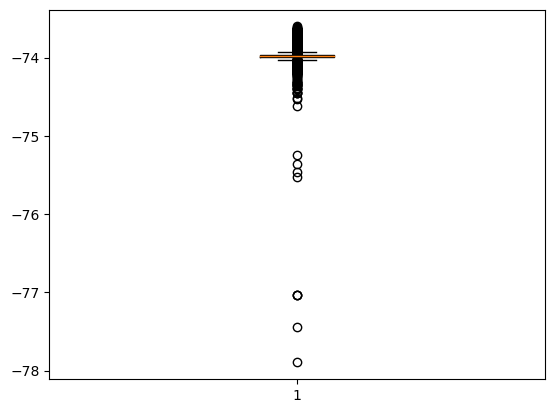

In [34]:
# Удалим всё что больше чем -73.6
data_with_weather.drop(index=data_with_weather[data_with_weather['pickup_longitude'] > -73.6].index, inplace=True)
plt.boxplot(data_with_weather['pickup_longitude'])

In [35]:
i = -74
while i > -79:
    print(f"кол-во записей с значением меньше {i}: {len(data_with_weather[data_with_weather['pickup_longitude']<i])}")
    i -= 0.2

кол-во записей с значением меньше -74: 115814
кол-во записей с значением меньше -74.2: 46
кол-во записей с значением меньше -74.4: 17
кол-во записей с значением меньше -74.60000000000001: 10
кол-во записей с значением меньше -74.80000000000001: 9
кол-во записей с значением меньше -75.00000000000001: 9
кол-во записей с значением меньше -75.20000000000002: 9
кол-во записей с значением меньше -75.40000000000002: 7
кол-во записей с значением меньше -75.60000000000002: 5
кол-во записей с значением меньше -75.80000000000003: 5
кол-во записей с значением меньше -76.00000000000003: 5
кол-во записей с значением меньше -76.20000000000003: 5
кол-во записей с значением меньше -76.40000000000003: 5
кол-во записей с значением меньше -76.60000000000004: 5
кол-во записей с значением меньше -76.80000000000004: 5
кол-во записей с значением меньше -77.00000000000004: 5
кол-во записей с значением меньше -77.20000000000005: 2
кол-во записей с значением меньше -77.40000000000005: 2
кол-во записей с значение

{'whiskers': [<matplotlib.lines.Line2D at 0x11399ddfa10>,
 'caps': [<matplotlib.lines.Line2D at 0x11399db9250>,
 'boxes': [<matplotlib.lines.Line2D at 0x11399ddef50>],
 'medians': [<matplotlib.lines.Line2D at 0x11399dba790>],
 'fliers': [<matplotlib.lines.Line2D at 0x11399f83150>],
 'means': []}

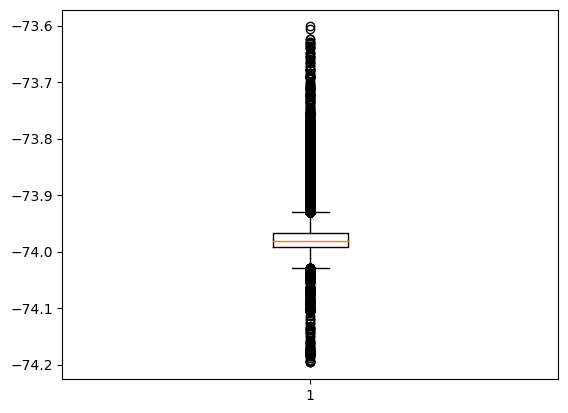

In [36]:
# удалим всё что меньше чем -74.2
data_with_weather.drop(index=data_with_weather[data_with_weather['pickup_longitude'] < -74.2].index, inplace=True)
plt.boxplot(data_with_weather['pickup_longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11399d27a10>,
 'caps': [<matplotlib.lines.Line2D at 0x11399d091d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11399d26d10>],
 'medians': [<matplotlib.lines.Line2D at 0x11399d0a810>],
 'fliers': [<matplotlib.lines.Line2D at 0x11399d08d10>],
 'means': []}

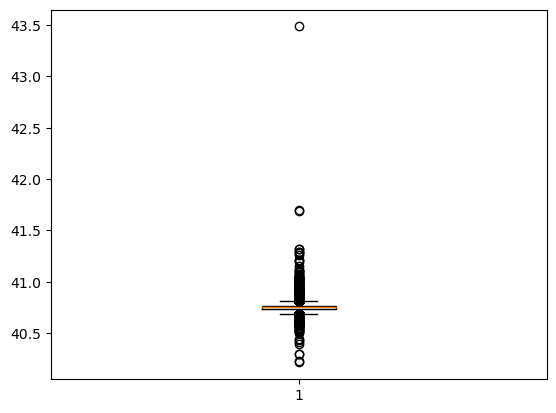

In [37]:
# pickup latitude
plt.boxplot(data_with_weather['pickup_latitude'])

In [38]:
i = 40
while i < 44:
    print(f"кол-во записей с значением больше {i}: {len(data_with_weather[data_with_weather['pickup_latitude']>i])}")
    i += 0.2

кол-во записей с значением больше 40: 888307
кол-во записей с значением больше 40.2: 888307
кол-во записей с значением больше 40.400000000000006: 888302
кол-во записей с значением больше 40.60000000000001: 888236
кол-во записей с значением больше 40.80000000000001: 17373
кол-во записей с значением больше 41.000000000000014: 39
кол-во записей с значением больше 41.20000000000002: 11
кол-во записей с значением больше 41.40000000000002: 3
кол-во записей с значением больше 41.60000000000002: 3
кол-во записей с значением больше 41.800000000000026: 1
кол-во записей с значением больше 42.00000000000003: 1
кол-во записей с значением больше 42.20000000000003: 1
кол-во записей с значением больше 42.400000000000034: 1
кол-во записей с значением больше 42.60000000000004: 1
кол-во записей с значением больше 42.80000000000004: 1
кол-во записей с значением больше 43.00000000000004: 1
кол-во записей с значением больше 43.200000000000045: 1
кол-во записей с значением больше 43.40000000000005: 1
кол-во 

In [39]:
i = 41
while i > 38:
    print(f"кол-во записей с значением меньше {i}: {len(data_with_weather[data_with_weather['pickup_latitude']<i])}")
    i -= 0.2

кол-во записей с значением меньше 41: 888268
кол-во записей с значением меньше 40.8: 870934
кол-во записей с значением меньше 40.599999999999994: 71
кол-во записей с значением меньше 40.39999999999999: 5
кол-во записей с значением меньше 40.19999999999999: 0
кол-во записей с значением меньше 39.999999999999986: 0
кол-во записей с значением меньше 39.79999999999998: 0
кол-во записей с значением меньше 39.59999999999998: 0
кол-во записей с значением меньше 39.39999999999998: 0
кол-во записей с значением меньше 39.199999999999974: 0
кол-во записей с значением меньше 38.99999999999997: 0
кол-во записей с значением меньше 38.79999999999997: 0
кол-во записей с значением меньше 38.599999999999966: 0
кол-во записей с значением меньше 38.39999999999996: 0
кол-во записей с значением меньше 38.19999999999996: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x11399b514d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11399b52bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11399b50990>],
 'medians': [<matplotlib.lines.Line2D at 0x11399b3c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x11399b52750>],
 'means': []}

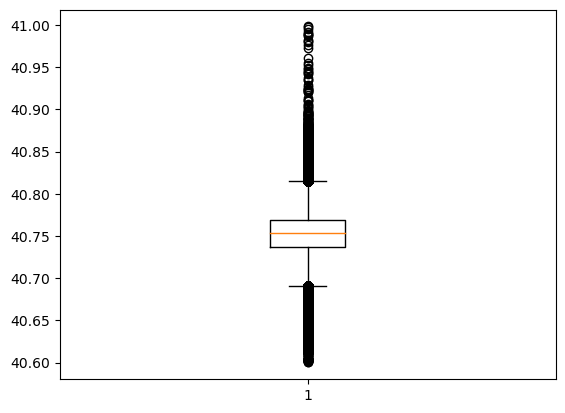

In [40]:
# удалим всё что меньше чем 40.6 и больше чем 41
data_with_weather.drop(index=data_with_weather[data_with_weather['pickup_latitude'] < 40.6].index, inplace=True)
data_with_weather.drop(index=data_with_weather[data_with_weather['pickup_latitude'] > 41].index, inplace=True)
plt.boxplot(data_with_weather['pickup_latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11399a69090>,
 'caps': [<matplotlib.lines.Line2D at 0x11399a6a890>,
 'boxes': [<matplotlib.lines.Line2D at 0x11399a686d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11399a6bd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x113a95cc890>],
 'means': []}

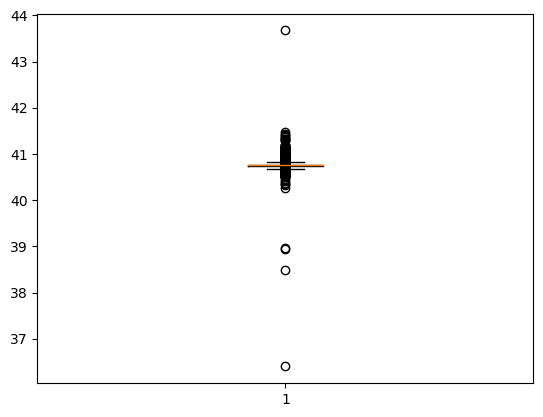

In [41]:
# dropoff latitude
plt.boxplot(data_with_weather['dropoff_latitude'])

In [42]:
i = 40
while i < 44:
    print(f"кол-во записей с значением больше {i}: {len(data_with_weather[data_with_weather['dropoff_latitude']>i])}")
    i += 0.2

кол-во записей с значением больше 40: 888193
кол-во записей с значением больше 40.2: 888193
кол-во записей с значением больше 40.400000000000006: 888189
кол-во записей с значением больше 40.60000000000001: 887548
кол-во записей с значением больше 40.80000000000001: 39898
кол-во записей с значением больше 41.000000000000014: 128
кол-во записей с значением больше 41.20000000000002: 12
кол-во записей с значением больше 41.40000000000002: 4
кол-во записей с значением больше 41.60000000000002: 1
кол-во записей с значением больше 41.800000000000026: 1
кол-во записей с значением больше 42.00000000000003: 1
кол-во записей с значением больше 42.20000000000003: 1
кол-во записей с значением больше 42.400000000000034: 1
кол-во записей с значением больше 42.60000000000004: 1
кол-во записей с значением больше 42.80000000000004: 1
кол-во записей с значением больше 43.00000000000004: 1
кол-во записей с значением больше 43.200000000000045: 1
кол-во записей с значением больше 43.40000000000005: 1
кол-во

In [43]:
i = 41
while i > 36:
    print(f"кол-во записей с значением меньше {i}: {len(data_with_weather[data_with_weather['dropoff_latitude']<i])}")
    i -= 0.2

кол-во записей с значением меньше 41: 888069
кол-во записей с значением меньше 40.8: 848299
кол-во записей с значением меньше 40.599999999999994: 649
кол-во записей с значением меньше 40.39999999999999: 8
кол-во записей с значением меньше 40.19999999999999: 4
кол-во записей с значением меньше 39.999999999999986: 4
кол-во записей с значением меньше 39.79999999999998: 4
кол-во записей с значением меньше 39.59999999999998: 4
кол-во записей с значением меньше 39.39999999999998: 4
кол-во записей с значением меньше 39.199999999999974: 4
кол-во записей с значением меньше 38.99999999999997: 4
кол-во записей с значением меньше 38.79999999999997: 2
кол-во записей с значением меньше 38.599999999999966: 2
кол-во записей с значением меньше 38.39999999999996: 1
кол-во записей с значением меньше 38.19999999999996: 1
кол-во записей с значением меньше 37.99999999999996: 1
кол-во записей с значением меньше 37.799999999999955: 1
кол-во записей с значением меньше 37.59999999999995: 1
кол-во записей с знач

{'whiskers': [<matplotlib.lines.Line2D at 0x113999ac2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x113999adb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x113999c3610>],
 'medians': [<matplotlib.lines.Line2D at 0x113999ae890>],
 'fliers': [<matplotlib.lines.Line2D at 0x113999c3590>],
 'means': []}

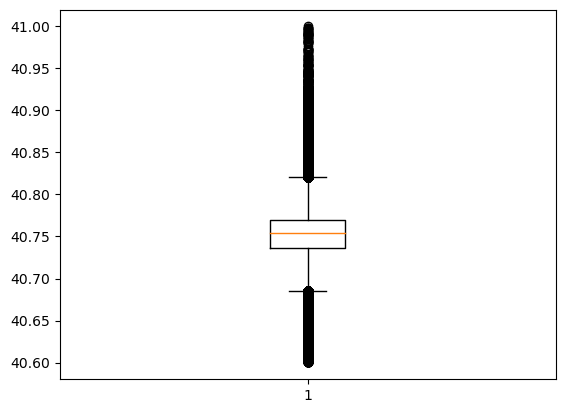

In [44]:
# удалим всё что меньше чем 40.6 и больше чем 41
data_with_weather.drop(index=data_with_weather[data_with_weather['dropoff_latitude'] < 40.6].index, inplace=True)
data_with_weather.drop(index=data_with_weather[data_with_weather['dropoff_latitude'] > 41].index, inplace=True)
plt.boxplot(data_with_weather['dropoff_latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x113997e1410>,
 'caps': [<matplotlib.lines.Line2D at 0x113997e2b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x113997e0890>],
 'medians': [<matplotlib.lines.Line2D at 0x113997cc210>],
 'fliers': [<matplotlib.lines.Line2D at 0x11399a9ff90>],
 'means': []}

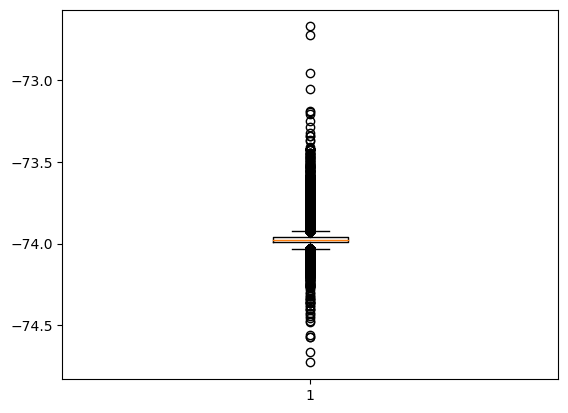

In [45]:
# dropoff longitude
plt.boxplot(data_with_weather['dropoff_longitude'])

In [46]:
i = -74
while i > -75:
    print(f"кол-во записей с значением меньше {i}: {len(data_with_weather[data_with_weather['dropoff_longitude']<i])}")
    i -= 0.2

кол-во записей с значением меньше -74: 115465
кол-во записей с значением меньше -74.2: 65
кол-во записей с значением меньше -74.4: 14
кол-во записей с значением меньше -74.60000000000001: 2
кол-во записей с значением меньше -74.80000000000001: 0


In [47]:
i = -74
while i < -72:
    print(f"кол-во записей с значением больше {i}: {len(data_with_weather[data_with_weather['dropoff_longitude']>i])}")
    i += 0.2

кол-во записей с значением больше -74: 771896
кол-во записей с значением больше -73.8: 9834
кол-во записей с значением больше -73.6: 100
кол-во записей с значением больше -73.39999999999999: 14
кол-во записей с значением больше -73.19999999999999: 6
кол-во записей с значением больше -72.99999999999999: 3
кол-во записей с значением больше -72.79999999999998: 2
кол-во записей с значением больше -72.59999999999998: 0
кол-во записей с значением больше -72.39999999999998: 0
кол-во записей с значением больше -72.19999999999997: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x113994affd0>,
 'caps': [<matplotlib.lines.Line2D at 0x113994898d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x113994af310>],
 'medians': [<matplotlib.lines.Line2D at 0x1139948ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1139948ad90>],
 'means': []}

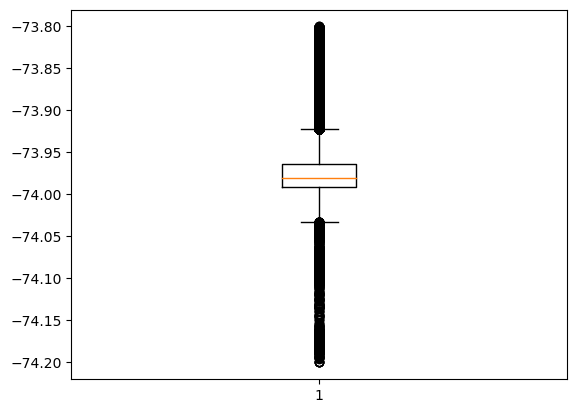

In [48]:
# удалим всё что меньше чем -74.2 и больше чем -73.8
data_with_weather.drop(index=data_with_weather[data_with_weather['dropoff_longitude'] < -74.2].index, inplace=True)
data_with_weather.drop(index=data_with_weather[data_with_weather['dropoff_longitude'] > -73.8].index, inplace=True)
plt.boxplot(data_with_weather['dropoff_longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x113993dbd50>,
 'caps': [<matplotlib.lines.Line2D at 0x113993bd390>,
 'boxes': [<matplotlib.lines.Line2D at 0x113993db050>],
 'medians': [<matplotlib.lines.Line2D at 0x113993beb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1139978e7d0>],
 'means': []}

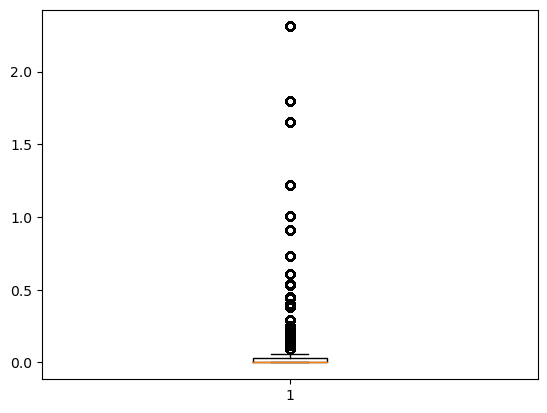

In [49]:
# pick precip
plt.boxplot(data_with_weather['pick_precip'])

In [50]:
i = 0
while i < 3:
    print(f"кол-во записей с значением больше {i}: {len(data_with_weather[data_with_weather['pick_precip']>i])}")
    i += 0.1

кол-во записей с значением больше 0: 281664
кол-во записей с значением больше 0.1: 154705
кол-во записей с значением больше 0.2: 108465
кол-во записей с значением больше 0.30000000000000004: 78946
кол-во записей с значением больше 0.4: 67496
кол-во записей с значением больше 0.5: 51463
кол-во записей с значением больше 0.6: 38832
кол-во записей с значением больше 0.7: 32839
кол-во записей с значением больше 0.7999999999999999: 27315
кол-во записей с значением больше 0.8999999999999999: 27315
кол-во записей с значением больше 0.9999999999999999: 21942
кол-во записей с значением больше 1.0999999999999999: 16485
кол-во записей с значением больше 1.2: 16485
кол-во записей с значением больше 1.3: 10457
кол-во записей с значением больше 1.4000000000000001: 10457
кол-во записей с значением больше 1.5000000000000002: 10457
кол-во записей с значением больше 1.6000000000000003: 10457
кол-во записей с значением больше 1.7000000000000004: 6472
кол-во записей с значением больше 1.8000000000000005: 

{'whiskers': [<matplotlib.lines.Line2D at 0x113993191d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1139931a050>,
 'boxes': [<matplotlib.lines.Line2D at 0x11399318650>],
 'medians': [<matplotlib.lines.Line2D at 0x1139931bb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1139b5e2610>],
 'means': []}

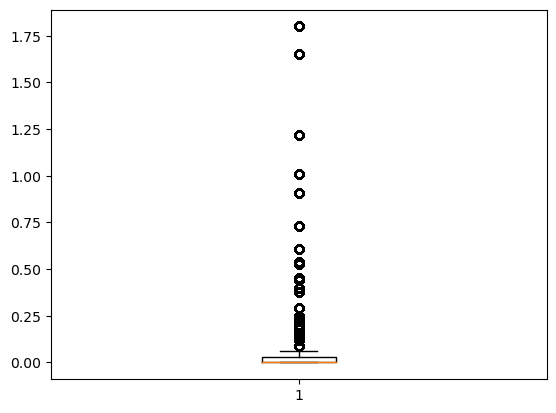

In [51]:
# удалим всё что  больше чем 1.8
data_with_weather.drop(index=data_with_weather[data_with_weather['pick_precip'] > 1.8].index, inplace=True)
plt.boxplot(data_with_weather['pick_precip'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1139916fcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x11399149510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1139916f3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1139914ab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x113aee81490>],
 'means': []}

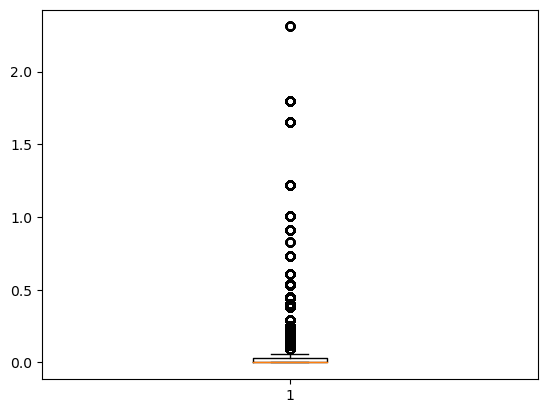

In [52]:
# drop precip
plt.boxplot(data_with_weather['drop_precip'])

In [53]:
i = 0
while i < 3:
    print(f"кол-во записей с значением больше {i}: {len(data_with_weather[data_with_weather['drop_precip']>i])}")
    i += 0.1

кол-во записей с значением больше 0: 280662
кол-во записей с значением больше 0.1: 153399
кол-во записей с значением больше 0.2: 107083
кол-во записей с значением больше 0.30000000000000004: 77738
кол-во записей с значением больше 0.4: 66289
кол-во записей с значением больше 0.5: 50290
кол-во записей с значением больше 0.6: 37741
кол-во записей с значением больше 0.7: 31754
кол-во записей с значением больше 0.7999999999999999: 26230
кол-во записей с значением больше 0.8999999999999999: 26134
кол-во записей с значением больше 0.9999999999999999: 20701
кол-во записей с значением больше 1.0999999999999999: 15256
кол-во записей с значением больше 1.2: 15256
кол-во записей с значением больше 1.3: 9274
кол-во записей с значением больше 1.4000000000000001: 9274
кол-во записей с значением больше 1.5000000000000002: 9274
кол-во записей с значением больше 1.6000000000000003: 9274
кол-во записей с значением больше 1.7000000000000004: 5338
кол-во записей с значением больше 1.8000000000000005: 75
к

{'whiskers': [<matplotlib.lines.Line2D at 0x11398f9c750>,
 'caps': [<matplotlib.lines.Line2D at 0x11398f9dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11398fbbcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x11398f9f650>],
 'fliers': [<matplotlib.lines.Line2D at 0x11398fbbad0>],
 'means': []}

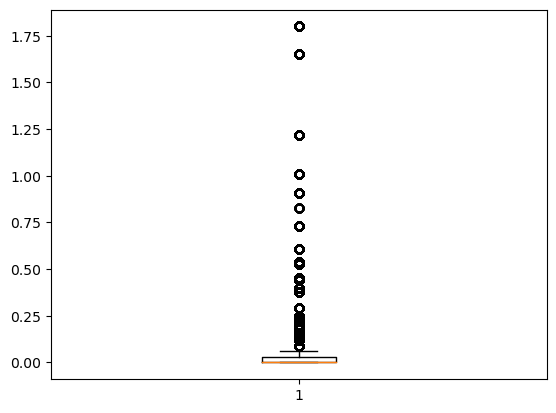

In [54]:
# удалим всё что  больше чем 1.8
data_with_weather.drop(index=data_with_weather[data_with_weather['drop_precip'] > 1.8].index, inplace=True)
plt.boxplot(data_with_weather['drop_precip'])

Остальные данные было принято решение оставить

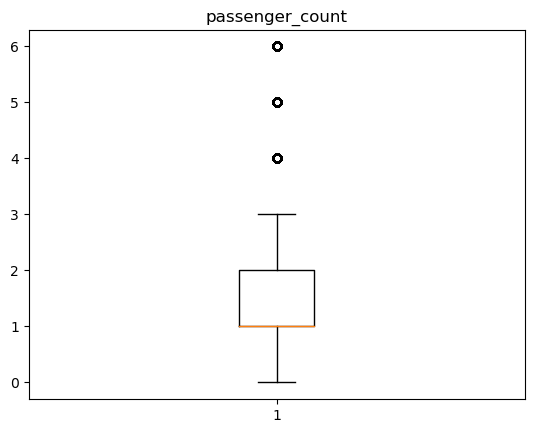

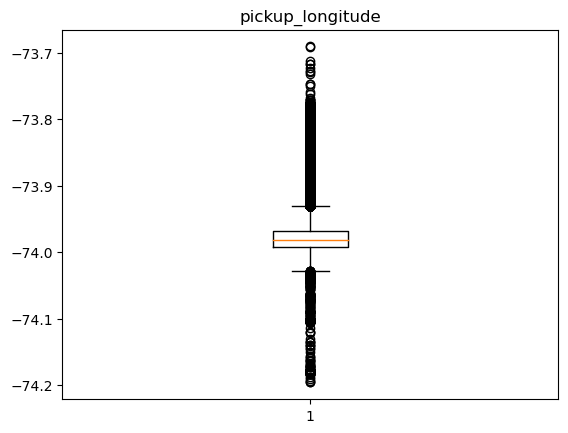

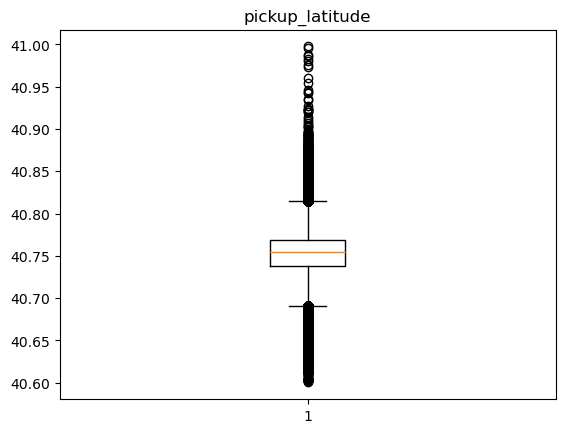

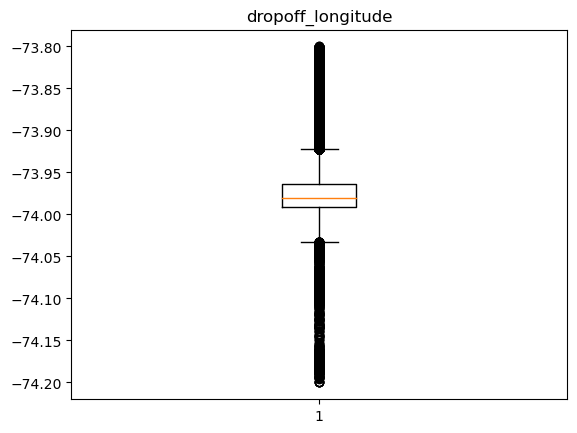

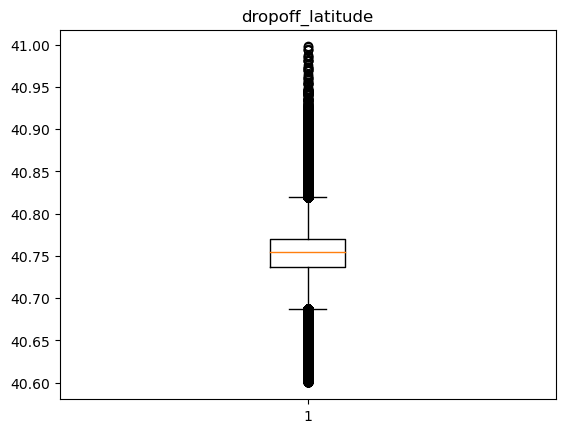

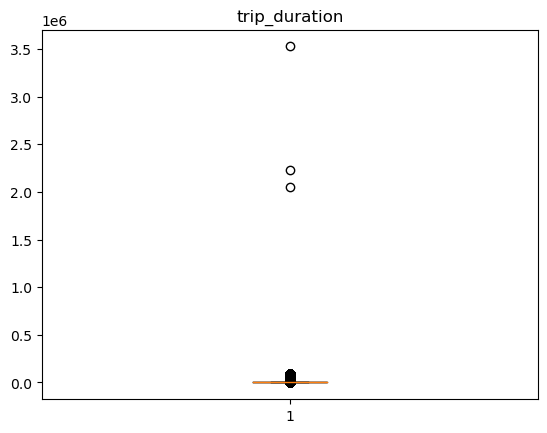

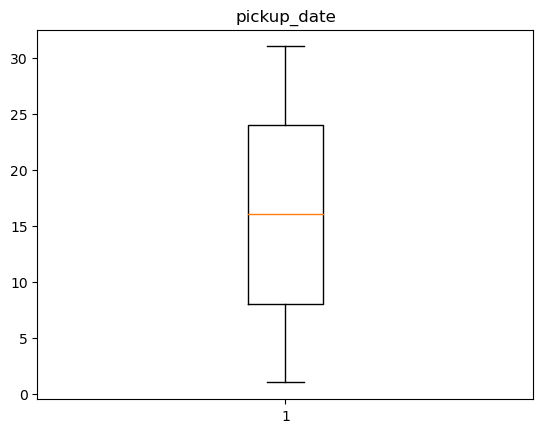

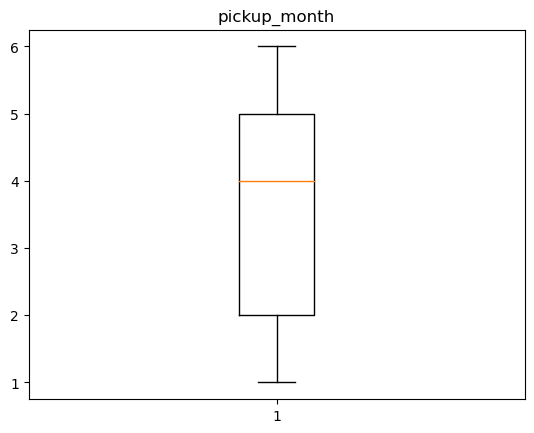

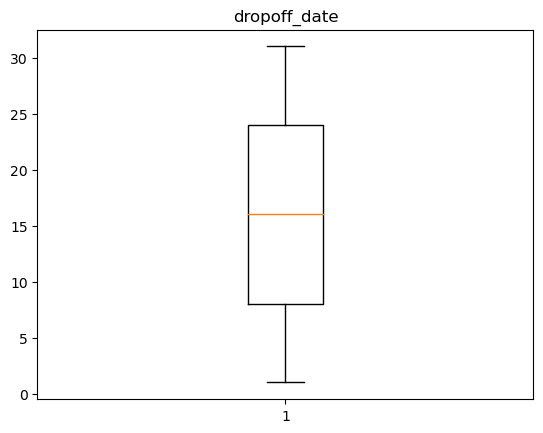

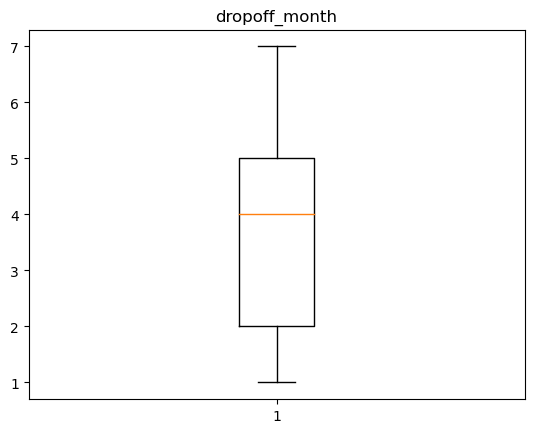

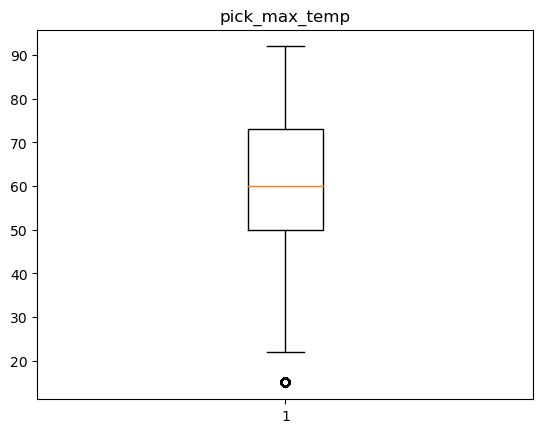

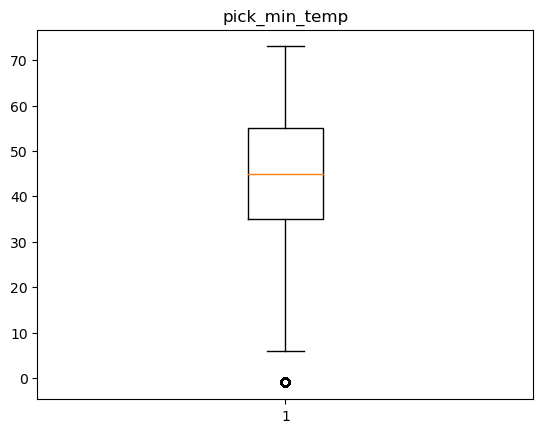

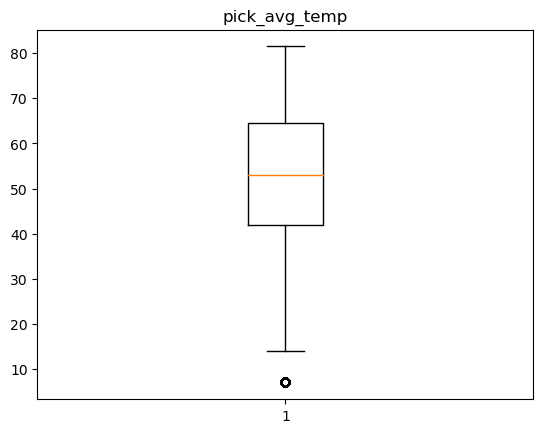

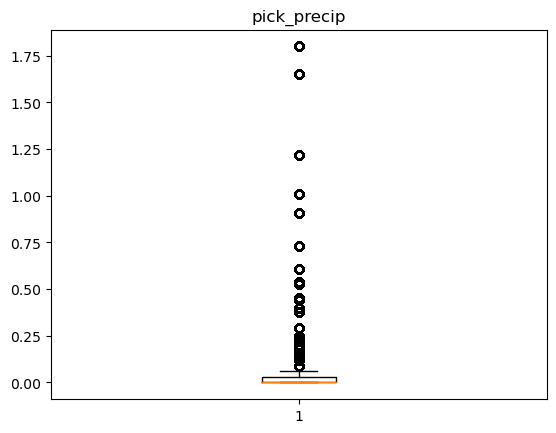

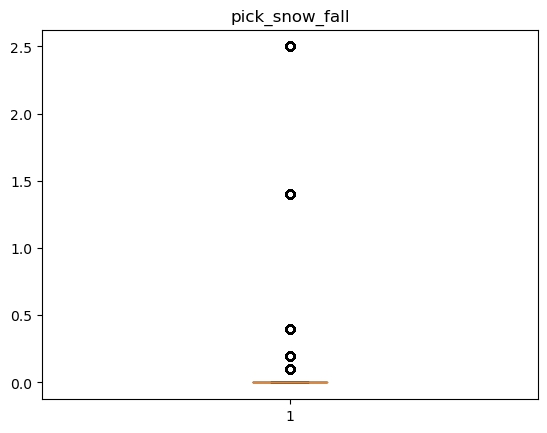

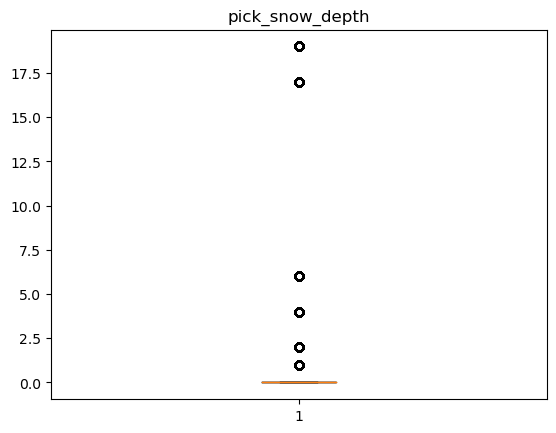

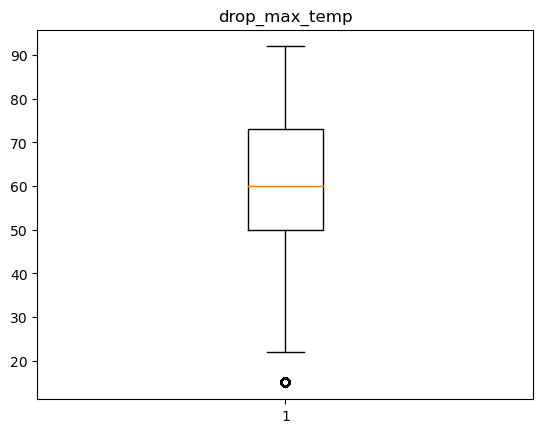

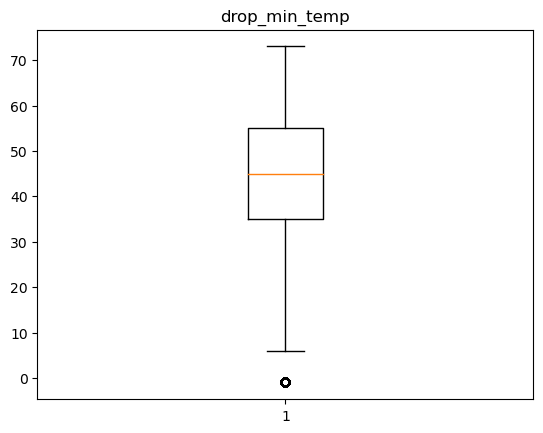

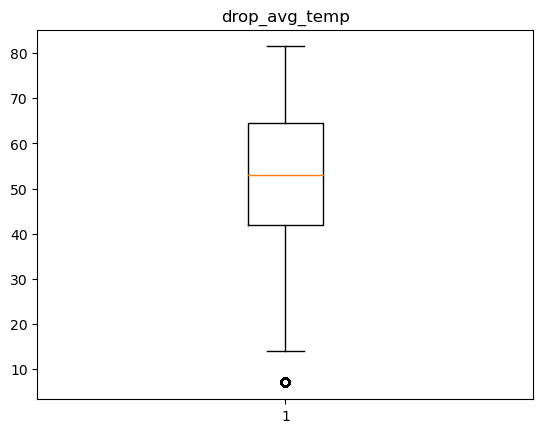

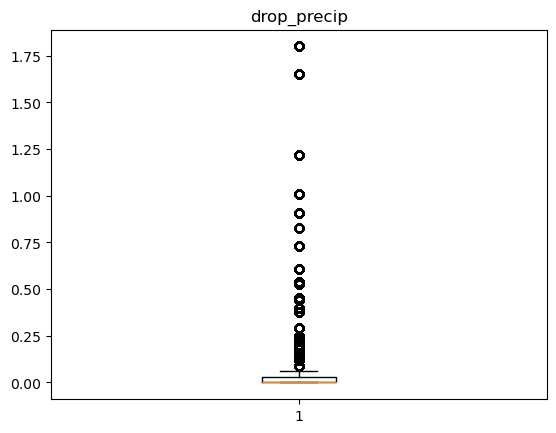

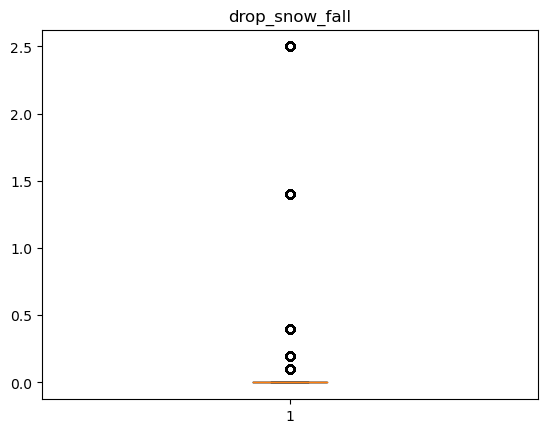

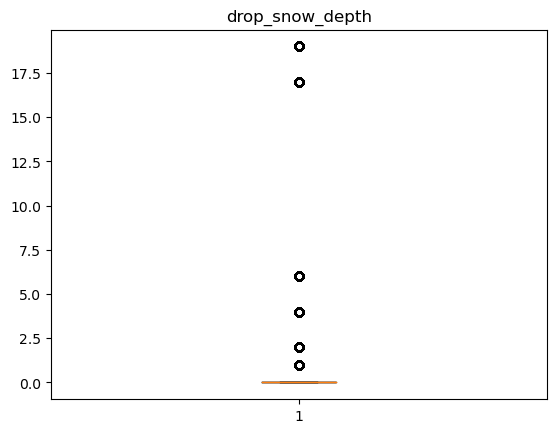

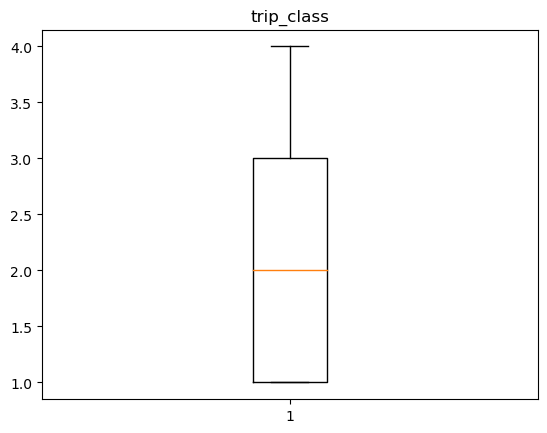

In [55]:
# Что по итогу стало с данными
for col in data_with_weather.columns:
    plt.boxplot(data_with_weather[col])
    plt.title(col)
    plt.show();

## Итог по модулю 1

После всех предобработок и взаимодействий наши данные стали выглядеть так:

In [56]:
data_with_weather.head(4)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,pickup_month,dropoff_date,dropoff_month,...,pick_precip,pick_snow_fall,pick_snow_depth,drop_max_temp,drop_min_temp,drop_avg_temp,drop_precip,drop_snow_fall,drop_snow_depth,trip_class
0,1,-73.982155,40.767937,-73.964630,40.765602,455,14,3,14,3,...,0.29,0.0,0,51,40,45.5,0.29,0.0,0,2
1,1,-73.980415,40.738564,-73.999481,40.731152,663,12,6,12,6,...,0.00,0.0,0,83,62,72.5,0.00,0.0,0,3
3,1,-74.010040,40.719971,-74.012268,40.706718,429,6,4,6,4,...,0.00,0.0,0,48,30,39.0,0.00,0.0,0,2
4,1,-73.973053,40.793209,-73.972923,40.782520,435,26,3,26,3,...,0.00,0.0,0,55,38,46.5,0.00,0.0,0,2


# Модуль 2

## 2.1 Разбиение набора на обучающую и тестовую выборки

In [57]:
# Для начала разобьём на данные на X(данные на которых будет производиться вычисления) и y(даные-метки)
X = data_with_weather.drop(columns=['trip_class'])

y = data_with_weather['trip_class']

<Axes: >

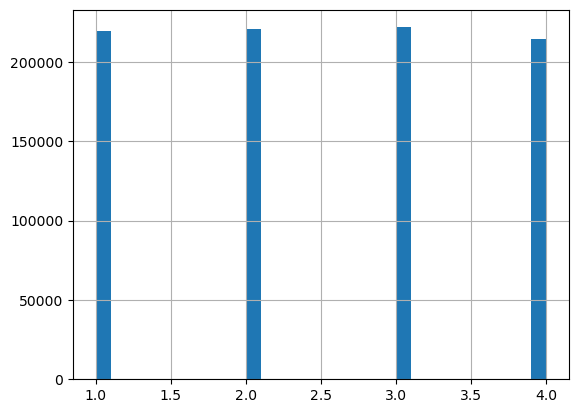

In [58]:
# Посмотрим на наличие дисбаланса классов
y.hist(bins=30)

In [59]:
y.value_counts(normalize=True)

trip_class
3    0.253088
2    0.251583
1    0.250744
4    0.244584
Name: proportion, dtype: float64

Дисбаланса не наблюдается

In [60]:
# Разделим на обучающую и тестовую выборку.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

## 2.2 Визуализация зависимостей данных

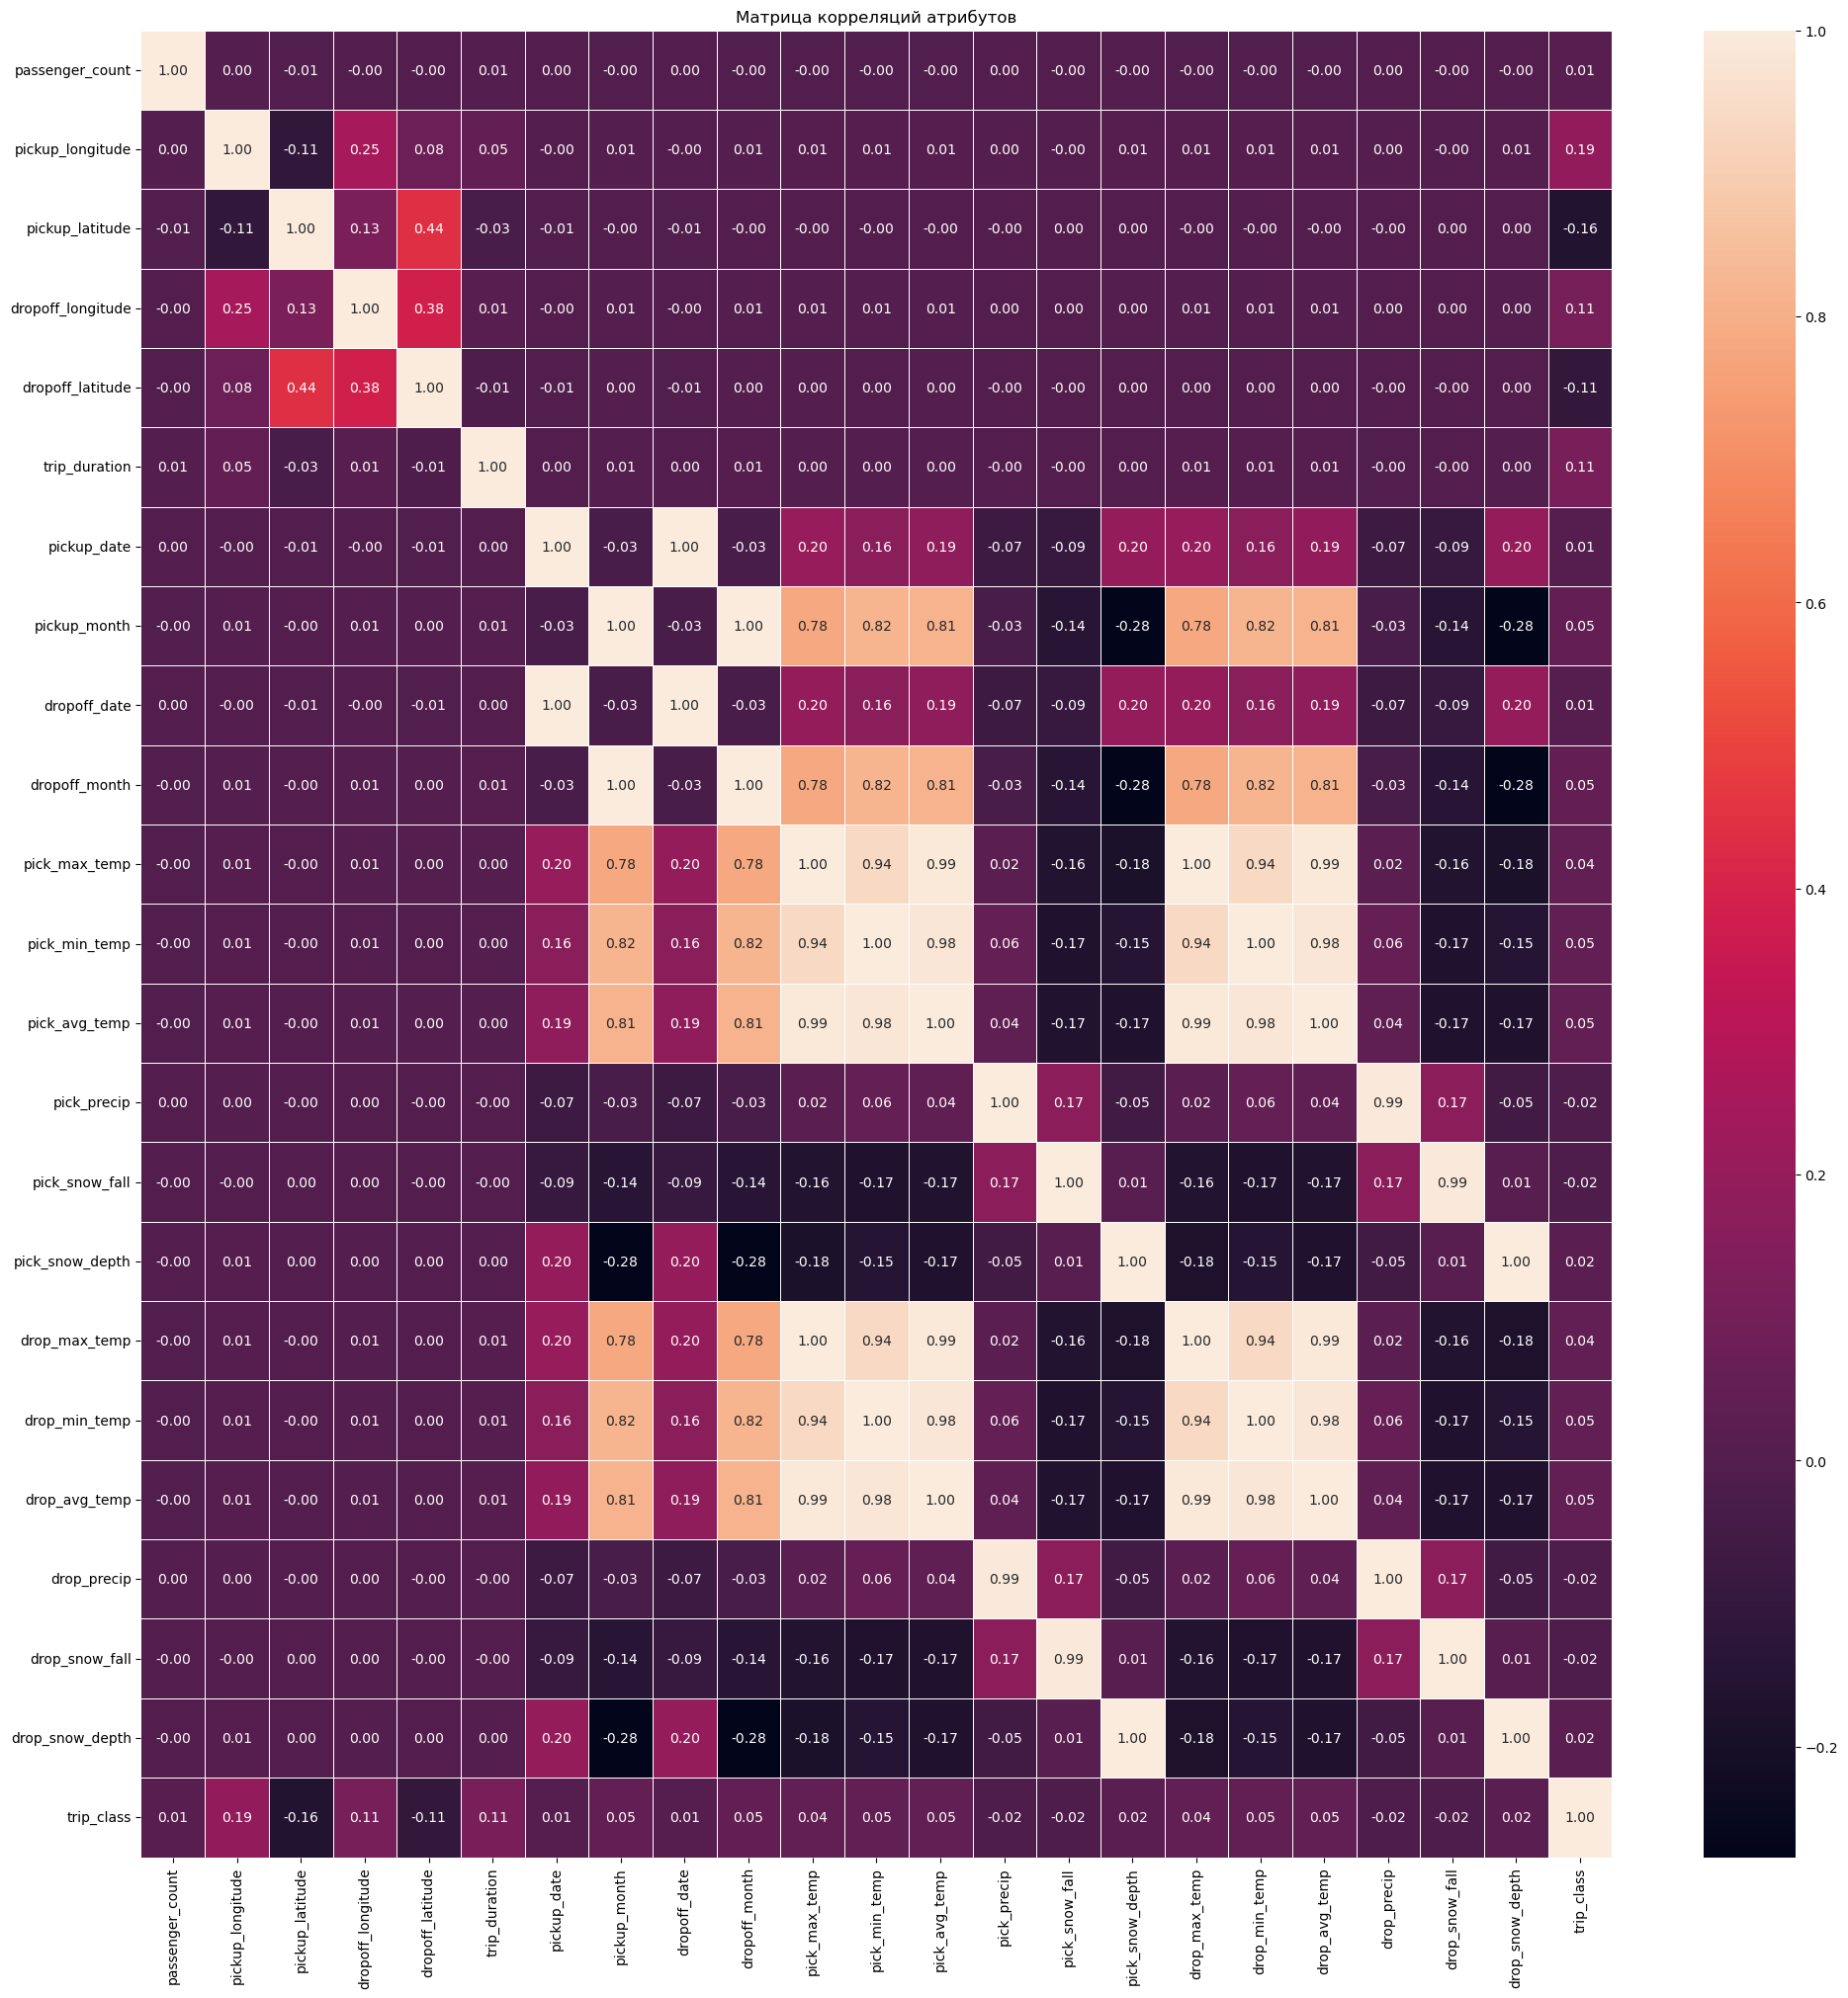

In [61]:
# Посмотрим на то как данные влияют на целевую переменную и взаимодействуют между собой. Для этого построим матрицу корреляций в виде тепловой карты
plt.figure(figsize=(24, 24))
sns.heatmap(data_with_weather.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций атрибутов')
plt.show()


Мы можем наблюдать что атрибуты pickup_date и dropoff_date, pickup_month и dropoff_month сильво коррелируют между собой.
Так же сильно коррелируют между собой все виды температур и и информация о осадках и снеге. Из первых четырёх атрибутов оставим только pickup_date и pickup_month, среди информации о температуре оставим pick_avg_temp(средняя температура на момент посадки), а так же оставим информацию о осадках и снеге на момент посадки.

In [62]:
X_train.drop(columns=['dropoff_date', 'dropoff_month', 'pick_max_temp', 'pick_min_temp', 'drop_max_temp',
                               'drop_min_temp', 'drop_avg_temp', 'drop_precip', 'drop_snow_fall', 'drop_snow_depth'], inplace=True)
X_test.drop(columns=['dropoff_date', 'dropoff_month', 'pick_max_temp', 'pick_min_temp', 'drop_max_temp',
                               'drop_min_temp', 'drop_avg_temp', 'drop_precip', 'drop_snow_fall', 'drop_snow_depth'], inplace=True)

In [63]:
# Что получилось по итогу
X_train.head(4)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,pickup_month,pick_avg_temp,pick_precip,pick_snow_fall,pick_snow_depth
866157,1,-73.946350,40.777161,-73.955757,40.763458,274,31,1,46.0,0.0,0.0,4
502524,1,-73.987465,40.755207,-73.986816,40.743008,586,6,4,39.0,0.0,0.0,0
286414,1,-73.982529,40.738377,-73.964279,40.719116,704,6,6,74.0,0.0,0.0,0
839976,6,-73.968796,40.755180,-73.973877,40.747608,201,29,1,35.5,0.0,0.0,6


In [64]:
X_test.head(4)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,pickup_month,pick_avg_temp,pick_precip,pick_snow_fall,pick_snow_depth
671320,1,-73.980026,40.734776,-73.975410,40.752247,341,5,1,20.0,0.00,0.0,0
980825,2,-73.988594,40.723141,-73.993042,40.669022,1037,16,3,56.5,0.02,0.0,0
339710,1,-73.962067,40.779037,-73.973480,40.755802,370,31,1,46.0,0.00,0.0,4
332718,3,-74.002403,40.750256,-73.985886,40.749969,750,31,3,61.0,0.00,0.0,0


## 2.3-2.4 Классификация исходных компетенций и Обучение

Для многоклассовой классификации будем использовать такие модели как метод опорных векторов, kneighborsclassifier, RandomForestClassifier.
Для оценивания моделей будем использовать точность, полноту и f-меру

In [65]:
# создадим функцию оценки
from sklearn.metrics import precision_score, recall_score, f1_score
def mark(presic, actual):
        print(f"Точность модели {precision_score(presic, actual, average='weighted')}")
        print(f"Полнота модели {recall_score(presic, actual, average='weighted')}")
        print(f"F-мера модели {f1_score(presic, actual, average='weighted')}")

In [66]:
# теперь RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=13, 
                                class_weight='balanced', n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=300,
                       n_jobs=-1)

In [67]:
mark(rf_clf.predict(X_test), y_test)

Точность модели 1.0
Полнота модели 1.0
F-мера модели 1.0


In [68]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
mark(knn_clf.predict(X_test), y_test)

Точность модели 0.9993068093337872
Полнота модели 0.999306708663574
F-мера модели 0.9993067391539872


у наших моделей наблюдаутся переобучение

## 2.5 Feature Engineering

Как мы знаем иногда понижение размерности понижает качество модели. Попробуем данный метод чтобы предотвратить переобучение первой модели

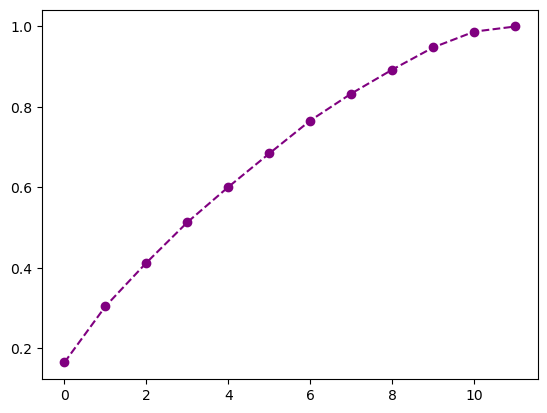

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

pca = PCA()
pca.fit(X_train_scaled) 

plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o--', color='purple');

Оставим только 10 компонент

In [71]:
X_train_new = PCA(n_components=10).fit_transform(X_train_scaled)
X_test_new = PCA(n_components=10).fit_transform(X_test_scaled)

In [72]:
pca_rf =  RandomForestClassifier(n_estimators=300, max_depth=13, 
                                class_weight='balanced', n_jobs=-1)
knn_pca = KNeighborsClassifier()

In [73]:
pca_rf.fit(X_train_new, y_train)
mark(pca_rf.predict(X_test_new), y_test)

Точность модели 0.6473887750257281
Полнота модели 0.6086755567728572
F-мера модели 0.6217822516271854


In [74]:
knn_pca.fit(X_train_new, y_train)

KNeighborsClassifier()

In [75]:
mark(knn_pca.predict(X_test_new), y_test)

Точность модели 0.5299989827653887
Полнота модели 0.5199941797764349
F-мера модели 0.5211534113337788


# Итог

У модели RandomForestClassifier наблюдается переобучение. Для того что бы избежать этого использовали понижение модели.
Метрики просели, но слишком сильно. Принято решение для данного набора использовать модель KNeighborsClassifier без понижения размерности.